In [ ]:
# dataset
# feature engineering
# feature scaling *
# balance dataset *
# split dataset *
# train model (NN, adaboost)
# evaluate model
# feature importance
# hyperparameter tuning
# cross validation
# final performance

In [ ]:
# train data --> train / feature importance / hyperparameter tuning / cross-validation
# validation data --> 1st evaluate model
# test data --> final evaluate model

In [ ]:
# edit the code in all MHHMHbb files
# run delphes for QCD3

In [3]:
!pip install uproot

In [1697]:
import uproot

import numpy as np
import pandas as pd
import random as rn

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from keras.metrics import AUC

from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.impute import KNNImputer

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import classification_report

from sklearn.inspection import permutation_importance

In [3]:
sig = uproot.open('/Users/puntong/Desktop/MLinHEP/data/yhhbb_selected2.root')
sig.classnames()

{'mssmhbb;1': 'TTree'}

In [4]:
tree_sig = sig[sig.keys()[0]]
arr_sig = np.array(tree_sig).T
df_sig = pd.DataFrame(arr_sig, columns=tree_sig.keys())

df_sig.insert(0, 'signal', 1.0)

df_sig

,signal,njets,nbjets,mj1,ptj1,etaj1,phij1,btagj1,flavorj1,mj2,...,dPhi34,pt1234,eta1234,phi1234,m1234,pt123,eta123,phi123,m123,ht
0,1.0,5.0,3.0,24.477640,562.563721,-1.785947,-2.964846,1.401298e-45,5.0,21.077326,...,2.663655,32.875244,-4.746307,-3.040559,1489.562378,0.000000,0.000000,0.000000,0.000000,1197.323608
1,1.0,6.0,4.0,74.486160,546.576355,0.174419,0.956324,1.401298e-45,5.0,31.041588,...,3.034030,26.388254,3.547153,2.568986,1237.140869,0.000000,0.000000,0.000000,0.000000,1270.120239
2,1.0,6.0,2.0,128.793915,1151.783813,1.072880,2.475572,0.000000e+00,5.0,74.739754,...,1.377620,269.159912,2.342948,2.098535,2956.007812,0.000000,0.000000,0.000000,0.000000,2296.383789
3,1.0,6.0,2.0,128.959351,629.879333,0.558628,-2.981854,1.401298e-45,5.0,98.810066,...,-1.137819,166.775055,2.190549,-2.905230,1373.129150,0.000000,0.000000,0.000000,0.000000,1394.048950
4,1.0,4.0,3.0,116.429916,786.488159,-0.428991,0.550536,1.401298e-45,5.0,124.427231,...,0.610634,26.245520,-4.002144,-0.279024,1785.773560,0.000000,0.000000,0.000000,0.000000,1732.852417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127826,1.0,5.0,3.0,67.185646,425.625702,-1.701318,-1.462790,1.401298e-45,5.0,18.980335,...,-2.672591,107.894798,-3.346567,-1.463672,1004.304810,61.379665,-4.131121,-0.295705,1098.980713,892.060059
127827,1.0,4.0,2.0,24.444519,233.614944,-1.520057,0.124795,0.000000e+00,5.0,17.126154,...,3.004475,35.404968,-3.463086,-2.874580,1031.138916,61.379665,-4.131121,-0.295705,1098.980713,766.294922
127828,1.0,7.0,2.0,117.910866,678.000549,-0.553920,-1.087936,1.401298e-45,5.0,12.913023,...,-0.333159,151.022522,-2.444788,-1.511846,1498.459961,61.379665,-4.131121,-0.295705,1098.980713,1405.669312
127829,1.0,5.0,2.0,77.772720,581.294861,-1.188299,0.976382,0.000000e+00,5.0,42.191124,...,0.282306,24.974180,-4.774837,0.702803,1268.195801,61.379665,-4.131121,-0.295705,1098.980713,1191.195435


In [ ]:
# QCD background 1st <-- in 'bg_data.tar.gz' in MLinHEP local
# QCD background 2nd <-- in 'download' folder in MLinHEP local
# QCD background 3rd <-- in 'QCD_add_2' folder in MLinHEP local & 'bg_data_2' directory in cluster

In [159]:
bg1 = uproot.open('/Users/puntong/Desktop/MLinHEP/data/QCD_bEnriched_full_selected2.root')
bg1.classnames()

{'mssmhbb;1': 'TTree'}

In [160]:
tree_bg1 = bg1[bg1.keys()[0]]
arr_bg1 = np.array(tree_bg1).T
df_bg1 = pd.DataFrame(arr_bg1, columns=tree_bg1.keys())

df_bg1.insert(0, 'signal', 0.0)

df_bg1

,signal,njets,nbjets,mj1,ptj1,etaj1,phij1,btagj1,flavorj1,mj2,...,dPhi34,pt1234,eta1234,phi1234,m1234,pt123,eta123,phi123,m123,ht
0,0.0,3.0,2.0,9.879178,73.981812,-1.777735,0.296607,1.401298e-45,5.0,5.406016,...,0.000000,0.000000,0.000000,0.000000,0.000000,17.622372,-3.657849,-2.993544,449.149048,184.182724
1,0.0,3.0,2.0,6.263337,58.057182,-1.050906,-1.903486,1.401298e-45,5.0,7.467936,...,0.000000,0.000000,0.000000,0.000000,0.000000,11.664165,-2.768462,1.911246,141.937866,128.613937
2,0.0,3.0,2.0,6.107628,53.268707,2.190122,-0.018552,0.000000e+00,2.0,5.428412,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.270136,5.098174,-1.798859,243.985153,124.179092
3,0.0,3.0,2.0,13.104043,59.274837,-1.780123,-2.599447,0.000000e+00,21.0,7.574505,...,0.000000,0.000000,0.000000,0.000000,0.000000,24.614426,-2.570158,0.336711,223.954941,151.404129
4,0.0,3.0,2.0,10.858967,76.141052,-0.170499,2.292235,1.401298e-45,5.0,12.468962,...,0.000000,0.000000,0.000000,0.000000,0.000000,11.337734,2.435274,0.841237,200.793900,165.497375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26782,0.0,4.0,2.0,12.203506,96.708237,-0.290376,-0.753676,1.401298e-45,5.0,9.669127,...,-1.137655,38.006912,0.123915,-1.596760,265.008392,19.340611,2.697859,2.440276,183.120163,230.534821
26783,0.0,7.0,3.0,11.967635,114.063805,1.777946,0.303318,1.401298e-45,5.0,11.921733,...,0.318308,70.968773,2.960346,-0.485827,594.781494,19.340611,2.697859,2.440276,183.120163,469.839172
26784,0.0,3.0,2.0,10.556330,87.909142,-1.823820,-0.733778,0.000000e+00,1.0,7.507997,...,0.318308,70.968773,2.960346,-0.485827,594.781494,46.715794,-1.808498,1.684932,590.003479,223.818924
26785,0.0,7.0,2.0,10.206004,66.896751,-0.001083,-2.528839,0.000000e+00,2.0,14.179635,...,-0.222839,70.532776,-1.666679,-1.827364,229.188278,46.715794,-1.808498,1.684932,590.003479,273.524933


In [155]:
bg2 = uproot.open('/Users/puntong/Desktop/MLinHEP/data/download/QCD_bEnriched_out_ext.root')
bg2.classnames()

{'mssmhbb;1': 'TTree'}

In [158]:
tree_bg2 = bg2[bg2.keys()[0]]
arr_bg2 = np.array(tree_bg2).T
df_bg2 = pd.DataFrame(arr_bg2, columns=tree_bg2.keys())

df_bg2.insert(0, 'signal', 0.0)

df_bg2

,signal,njets,nbjets,mj1,ptj1,etaj1,phij1,btagj1,flavorj1,mj2,...,dPhi34,pt1234,eta1234,phi1234,m1234,pt123,eta123,phi123,m123,ht
0,0.0,5.0,2.0,10.719017,85.290955,-1.647394,-2.091778,0.000000e+00,21.0,7.698431,...,-0.147075,12.217758,-4.563651,2.009908,280.380920,0.000000,0.000000,0.000000,0.000000,271.043793
1,0.0,4.0,2.0,13.612496,127.139923,-0.536033,-1.613155,0.000000e+00,2.0,10.611095,...,-0.945095,24.811367,-3.013066,1.738541,410.199554,0.000000,0.000000,0.000000,0.000000,288.831268
2,0.0,5.0,3.0,10.489699,69.946861,0.536651,2.927622,0.000000e+00,21.0,12.767791,...,2.415771,32.228951,-2.756029,2.171103,380.524963,0.000000,0.000000,0.000000,0.000000,264.142487
3,0.0,7.0,2.0,14.945162,109.791199,0.259779,1.295370,1.401298e-45,5.0,6.704553,...,3.060184,51.459984,1.544661,2.349796,352.665222,0.000000,0.000000,0.000000,0.000000,406.626709
4,0.0,3.0,2.0,9.155038,139.529190,0.766907,0.024406,0.000000e+00,1.0,6.456431,...,3.060184,51.459984,1.544661,2.349796,352.665222,32.601242,-2.262688,-0.055062,455.549286,249.623398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26048,0.0,5.0,2.0,35.300713,956.827576,-1.344593,-2.818677,0.000000e+00,1.0,39.131767,...,-0.644227,88.832306,-3.781980,-2.711145,2855.995117,12.511813,4.672460,-0.441116,2241.992188,2004.192871
26049,0.0,4.0,2.0,72.480194,902.755432,0.558395,2.257534,0.000000e+00,3.0,36.938919,...,2.503250,65.948158,4.197668,-3.033033,2151.060303,12.511813,4.672460,-0.441116,2241.992188,1868.127686
26050,0.0,3.0,2.0,51.573357,1375.864990,0.040462,-0.458885,1.401298e-45,5.0,94.551704,...,2.503250,65.948158,4.197668,-3.033033,2151.060303,36.805225,-4.096165,1.307067,2997.537842,2767.908936
26051,0.0,6.0,2.0,61.339664,976.136475,1.397884,2.685043,0.000000e+00,1.0,30.322567,...,0.526522,131.775162,3.028072,2.693191,2915.143555,36.805225,-4.096165,1.307067,2997.537842,2035.318481


In [523]:
bg3 = uproot.open('/Users/puntong/Desktop/MLinHEP/data/QCD_bEnriched_full_selected2_2.root')
bg3.classnames()

{'mssmhbb;1': 'TTree'}

In [524]:
tree_bg3 = bg3[bg3.keys()[0]]
arr_bg3 = np.array(tree_bg3).T
df_bg3 = pd.DataFrame(arr_bg3, columns=tree_bg3.keys())

df_bg3.insert(0, 'signal', 0.0)

df_bg3

,signal,njets,nbjets,mj1,ptj1,etaj1,phij1,btagj1,flavorj1,mj2,...,dPhi34,pt1234,eta1234,phi1234,m1234,pt123,eta123,phi123,m123,ht
0,0.0,4.0,3.0,19.176979,134.430527,0.272681,-0.440415,1.401298e-45,4.0,2.824430,...,1.493464,80.138512,2.879365,-0.783648,432.329590,0.000000,0.000000,0.000000,0.000000,302.455627
1,0.0,3.0,2.0,20.129944,68.106125,-1.518265,-1.401806,1.401298e-45,5.0,12.493168,...,1.493464,80.138512,2.879365,-0.783648,432.329590,17.634296,-3.080875,-2.782007,202.907333,143.322647
2,0.0,4.0,2.0,19.257618,83.039978,-0.418945,0.826074,1.401298e-45,5.0,12.846560,...,1.485522,23.531246,-3.223317,1.814784,377.256592,17.634296,-3.080875,-2.782007,202.907333,247.230453
3,0.0,3.0,2.0,9.686330,72.761353,-1.294257,0.135971,0.000000e+00,21.0,10.843710,...,1.485522,23.531246,-3.223317,1.814784,377.256592,9.142681,3.057330,0.252830,384.479218,187.745804
4,0.0,3.0,2.0,7.599099,81.423546,-1.358418,-1.973521,1.401298e-45,5.0,13.370839,...,1.485522,23.531246,-3.223317,1.814784,377.256592,36.822670,-2.690745,0.320012,214.447937,195.282715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34031,0.0,5.0,2.0,51.783176,1476.843262,-0.858612,-1.867797,0.000000e+00,2.0,69.205017,...,-1.913045,67.362030,-3.859672,-2.576359,4237.577148,370.776642,-1.016141,1.235013,2369.862549,3719.587402
34032,0.0,7.0,3.0,45.436874,985.365601,-0.389530,0.841342,1.401298e-45,1.0,35.396851,...,-0.494364,147.562149,-0.836664,1.273035,2431.796387,370.776642,-1.016141,1.235013,2369.862549,2241.396973
34033,0.0,6.0,2.0,62.035999,815.170959,1.108533,-2.972895,0.000000e+00,5.0,36.946915,...,3.116794,100.298225,3.850222,-2.435204,2335.704834,370.776642,-1.016141,1.235013,2369.862549,2086.261230
34034,0.0,4.0,3.0,26.168976,806.216370,0.636809,2.204137,1.401298e-45,5.0,61.752155,...,1.744361,139.343842,2.458805,2.836417,2701.663086,370.776642,-1.016141,1.235013,2369.862549,2087.479248


In [525]:
df_bg = pd.concat([df_bg1, df_bg2, df_bg3], axis=0, ignore_index=True)
df_bg

,signal,njets,nbjets,mj1,ptj1,etaj1,phij1,btagj1,flavorj1,mj2,...,dPhi34,pt1234,eta1234,phi1234,m1234,pt123,eta123,phi123,m123,ht
0,0.0,3.0,2.0,9.879178,73.981812,-1.777735,0.296607,1.401298e-45,5.0,5.406016,...,0.000000,0.000000,0.000000,0.000000,0.000000,17.622372,-3.657849,-2.993544,449.149048,184.182724
1,0.0,3.0,2.0,6.263337,58.057182,-1.050906,-1.903486,1.401298e-45,5.0,7.467936,...,0.000000,0.000000,0.000000,0.000000,0.000000,11.664165,-2.768462,1.911246,141.937866,128.613937
2,0.0,3.0,2.0,6.107628,53.268707,2.190122,-0.018552,0.000000e+00,2.0,5.428412,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.270136,5.098174,-1.798859,243.985153,124.179092
3,0.0,3.0,2.0,13.104043,59.274837,-1.780123,-2.599447,0.000000e+00,21.0,7.574505,...,0.000000,0.000000,0.000000,0.000000,0.000000,24.614426,-2.570158,0.336711,223.954941,151.404129
4,0.0,3.0,2.0,10.858967,76.141052,-0.170499,2.292235,1.401298e-45,5.0,12.468962,...,0.000000,0.000000,0.000000,0.000000,0.000000,11.337734,2.435274,0.841237,200.793900,165.497375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86871,0.0,5.0,2.0,51.783176,1476.843262,-0.858612,-1.867797,0.000000e+00,2.0,69.205017,...,-1.913045,67.362030,-3.859672,-2.576359,4237.577148,370.776642,-1.016141,1.235013,2369.862549,3719.587402
86872,0.0,7.0,3.0,45.436874,985.365601,-0.389530,0.841342,1.401298e-45,1.0,35.396851,...,-0.494364,147.562149,-0.836664,1.273035,2431.796387,370.776642,-1.016141,1.235013,2369.862549,2241.396973
86873,0.0,6.0,2.0,62.035999,815.170959,1.108533,-2.972895,0.000000e+00,5.0,36.946915,...,3.116794,100.298225,3.850222,-2.435204,2335.704834,370.776642,-1.016141,1.235013,2369.862549,2086.261230
86874,0.0,4.0,3.0,26.168976,806.216370,0.636809,2.204137,1.401298e-45,5.0,61.752155,...,1.744361,139.343842,2.458805,2.836417,2701.663086,370.776642,-1.016141,1.235013,2369.862549,2087.479248


In [530]:
data = pd.concat([df_sig, df_bg], axis=0, ignore_index=True)
data

,signal,njets,nbjets,mj1,ptj1,etaj1,phij1,btagj1,flavorj1,mj2,...,dPhi34,pt1234,eta1234,phi1234,m1234,pt123,eta123,phi123,m123,ht
0,1.0,5.0,3.0,24.477640,562.563721,-1.785947,-2.964846,1.401298e-45,5.0,21.077326,...,2.663655,32.875244,-4.746307,-3.040559,1489.562378,0.000000,0.000000,0.000000,0.000000,1197.323608
1,1.0,6.0,4.0,74.486160,546.576355,0.174419,0.956324,1.401298e-45,5.0,31.041588,...,3.034030,26.388254,3.547153,2.568986,1237.140869,0.000000,0.000000,0.000000,0.000000,1270.120239
2,1.0,6.0,2.0,128.793915,1151.783813,1.072880,2.475572,0.000000e+00,5.0,74.739754,...,1.377620,269.159912,2.342948,2.098535,2956.007812,0.000000,0.000000,0.000000,0.000000,2296.383789
3,1.0,6.0,2.0,128.959351,629.879333,0.558628,-2.981854,1.401298e-45,5.0,98.810066,...,-1.137819,166.775055,2.190549,-2.905230,1373.129150,0.000000,0.000000,0.000000,0.000000,1394.048950
4,1.0,4.0,3.0,116.429916,786.488159,-0.428991,0.550536,1.401298e-45,5.0,124.427231,...,0.610634,26.245520,-4.002144,-0.279024,1785.773560,0.000000,0.000000,0.000000,0.000000,1732.852417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214702,0.0,5.0,2.0,51.783176,1476.843262,-0.858612,-1.867797,0.000000e+00,2.0,69.205017,...,-1.913045,67.362030,-3.859672,-2.576359,4237.577148,370.776642,-1.016141,1.235013,2369.862549,3719.587402
214703,0.0,7.0,3.0,45.436874,985.365601,-0.389530,0.841342,1.401298e-45,1.0,35.396851,...,-0.494364,147.562149,-0.836664,1.273035,2431.796387,370.776642,-1.016141,1.235013,2369.862549,2241.396973
214704,0.0,6.0,2.0,62.035999,815.170959,1.108533,-2.972895,0.000000e+00,5.0,36.946915,...,3.116794,100.298225,3.850222,-2.435204,2335.704834,370.776642,-1.016141,1.235013,2369.862549,2086.261230
214705,0.0,4.0,3.0,26.168976,806.216370,0.636809,2.204137,1.401298e-45,5.0,61.752155,...,1.744361,139.343842,2.458805,2.836417,2701.663086,370.776642,-1.016141,1.235013,2369.862549,2087.479248


In [531]:
data.loc[data['njets'] == 3, ['mj4', 'ptj4', 'etaj4', 'phij4', 'btagj4', 'flavorj4']] = np.nan
data.loc[data['njets'] == 3, ['pt14', 'eta14', 'phi14', 'm14', 'dR14', 'dEta14', 'dPhi14']] = np.nan
data.loc[data['njets'] == 3, ['pt24', 'eta24', 'phi24', 'm24', 'dR24', 'dEta24', 'dPhi24']] = np.nan
data.loc[data['njets'] == 3, ['pt34', 'eta34', 'phi34', 'm34', 'dR34', 'dEta34', 'dPhi34']] = np.nan
data.loc[data['njets'] == 3, ['pt1234', 'eta1234', 'phi1234', 'm1234']] = np.nan

## do not need to change values for these columns, we will drop them later
#data.loc[data['njets'] >= 4, ['pt123', 'eta123', 'phi123', 'm123']] = np.nan

data = data.drop(['flavorj1', 'flavorj2', 'flavorj3', 'flavorj4'], axis=1)
data = data.drop(['pt123', 'eta123', 'phi123', 'm123'], axis=1)

# delete 3-jet events (35487 events)
data = data.drop(data[data['njets'] == 3].index)

data

,signal,njets,nbjets,mj1,ptj1,etaj1,phij1,btagj1,mj2,ptj2,...,phi34,m34,dR34,dEta34,dPhi34,pt1234,eta1234,phi1234,m1234,ht
0,1.0,5.0,3.0,24.477640,562.563721,-1.785947,-2.964846,1.401298e-45,21.077326,407.276550,...,-0.117042,175.039612,2.877028,1.087307,2.663655,32.875244,-4.746307,-3.040559,1489.562378,1197.323608
1,1.0,6.0,4.0,74.486160,546.576355,0.174419,0.956324,1.401298e-45,31.041588,494.443787,...,-1.815023,158.915146,3.096582,0.619263,3.034030,26.388254,3.547153,2.568986,1237.140869,1270.120239
2,1.0,6.0,2.0,128.793915,1151.783813,1.072880,2.475572,0.000000e+00,74.739754,618.788147,...,-0.370759,471.349579,2.322671,-1.870017,1.377620,269.159912,2.342948,2.098535,2956.007812,2296.383789
3,1.0,6.0,2.0,128.959351,629.879333,0.558628,-2.981854,1.401298e-45,98.810066,509.828400,...,-1.618940,105.935844,1.261319,0.544329,-1.137819,166.775055,2.190549,-2.905230,1373.129150,1394.048950
4,1.0,4.0,3.0,116.429916,786.488159,-0.428991,0.550536,1.401298e-45,124.427231,605.537415,...,-1.707270,81.503586,0.616193,-0.082587,0.610634,26.245520,-4.002144,-0.279024,1785.773560,1732.852417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214702,0.0,5.0,2.0,51.783176,1476.843262,-0.858612,-1.867797,0.000000e+00,69.205017,1200.569214,...,2.302782,832.382874,2.109468,-0.888884,-1.913045,67.362030,-3.859672,-2.576359,4237.577148,3719.587402
214703,0.0,7.0,3.0,45.436874,985.365601,-0.389530,0.841342,1.401298e-45,35.396851,889.872314,...,-0.810724,102.458992,0.702906,0.499681,-0.494364,147.562149,-0.836664,1.273035,2431.796387,2241.396973
214704,0.0,6.0,2.0,62.035999,815.170959,1.108533,-2.972895,0.000000e+00,36.946915,552.226440,...,0.952974,778.472229,3.850889,-2.261623,3.116794,100.298225,3.850222,-2.435204,2335.704834,2086.261230
214705,0.0,4.0,3.0,26.168976,806.216370,0.636809,2.204137,1.401298e-45,61.752155,621.910767,...,-0.060303,405.313690,2.170041,-1.290846,1.744361,139.343842,2.458805,2.836417,2701.663086,2087.479248


In [528]:
def All_Hist(data, bins=50, density=True, histtype='step'):
    fig = plt.figure(figsize=(40, 30))
    for idx, col in enumerate(data):
        if col != 'signal':
            fig.add_subplot(8, 9, idx)
            plt.hist(data[data['signal'] == 1.0][col], bins=bins, density=density, histtype=histtype, label='Signal')
            plt.hist(data[data['signal'] == 0.0][col], bins=bins, density=density, histtype=histtype, label='Background')
            plt.xlabel(col)
            if density == True:
                plt.ylabel('Density')
            else:
                plt.ylabel('Frequency')
            plt.legend()
    #plt.tight_layout()
    plt.show()

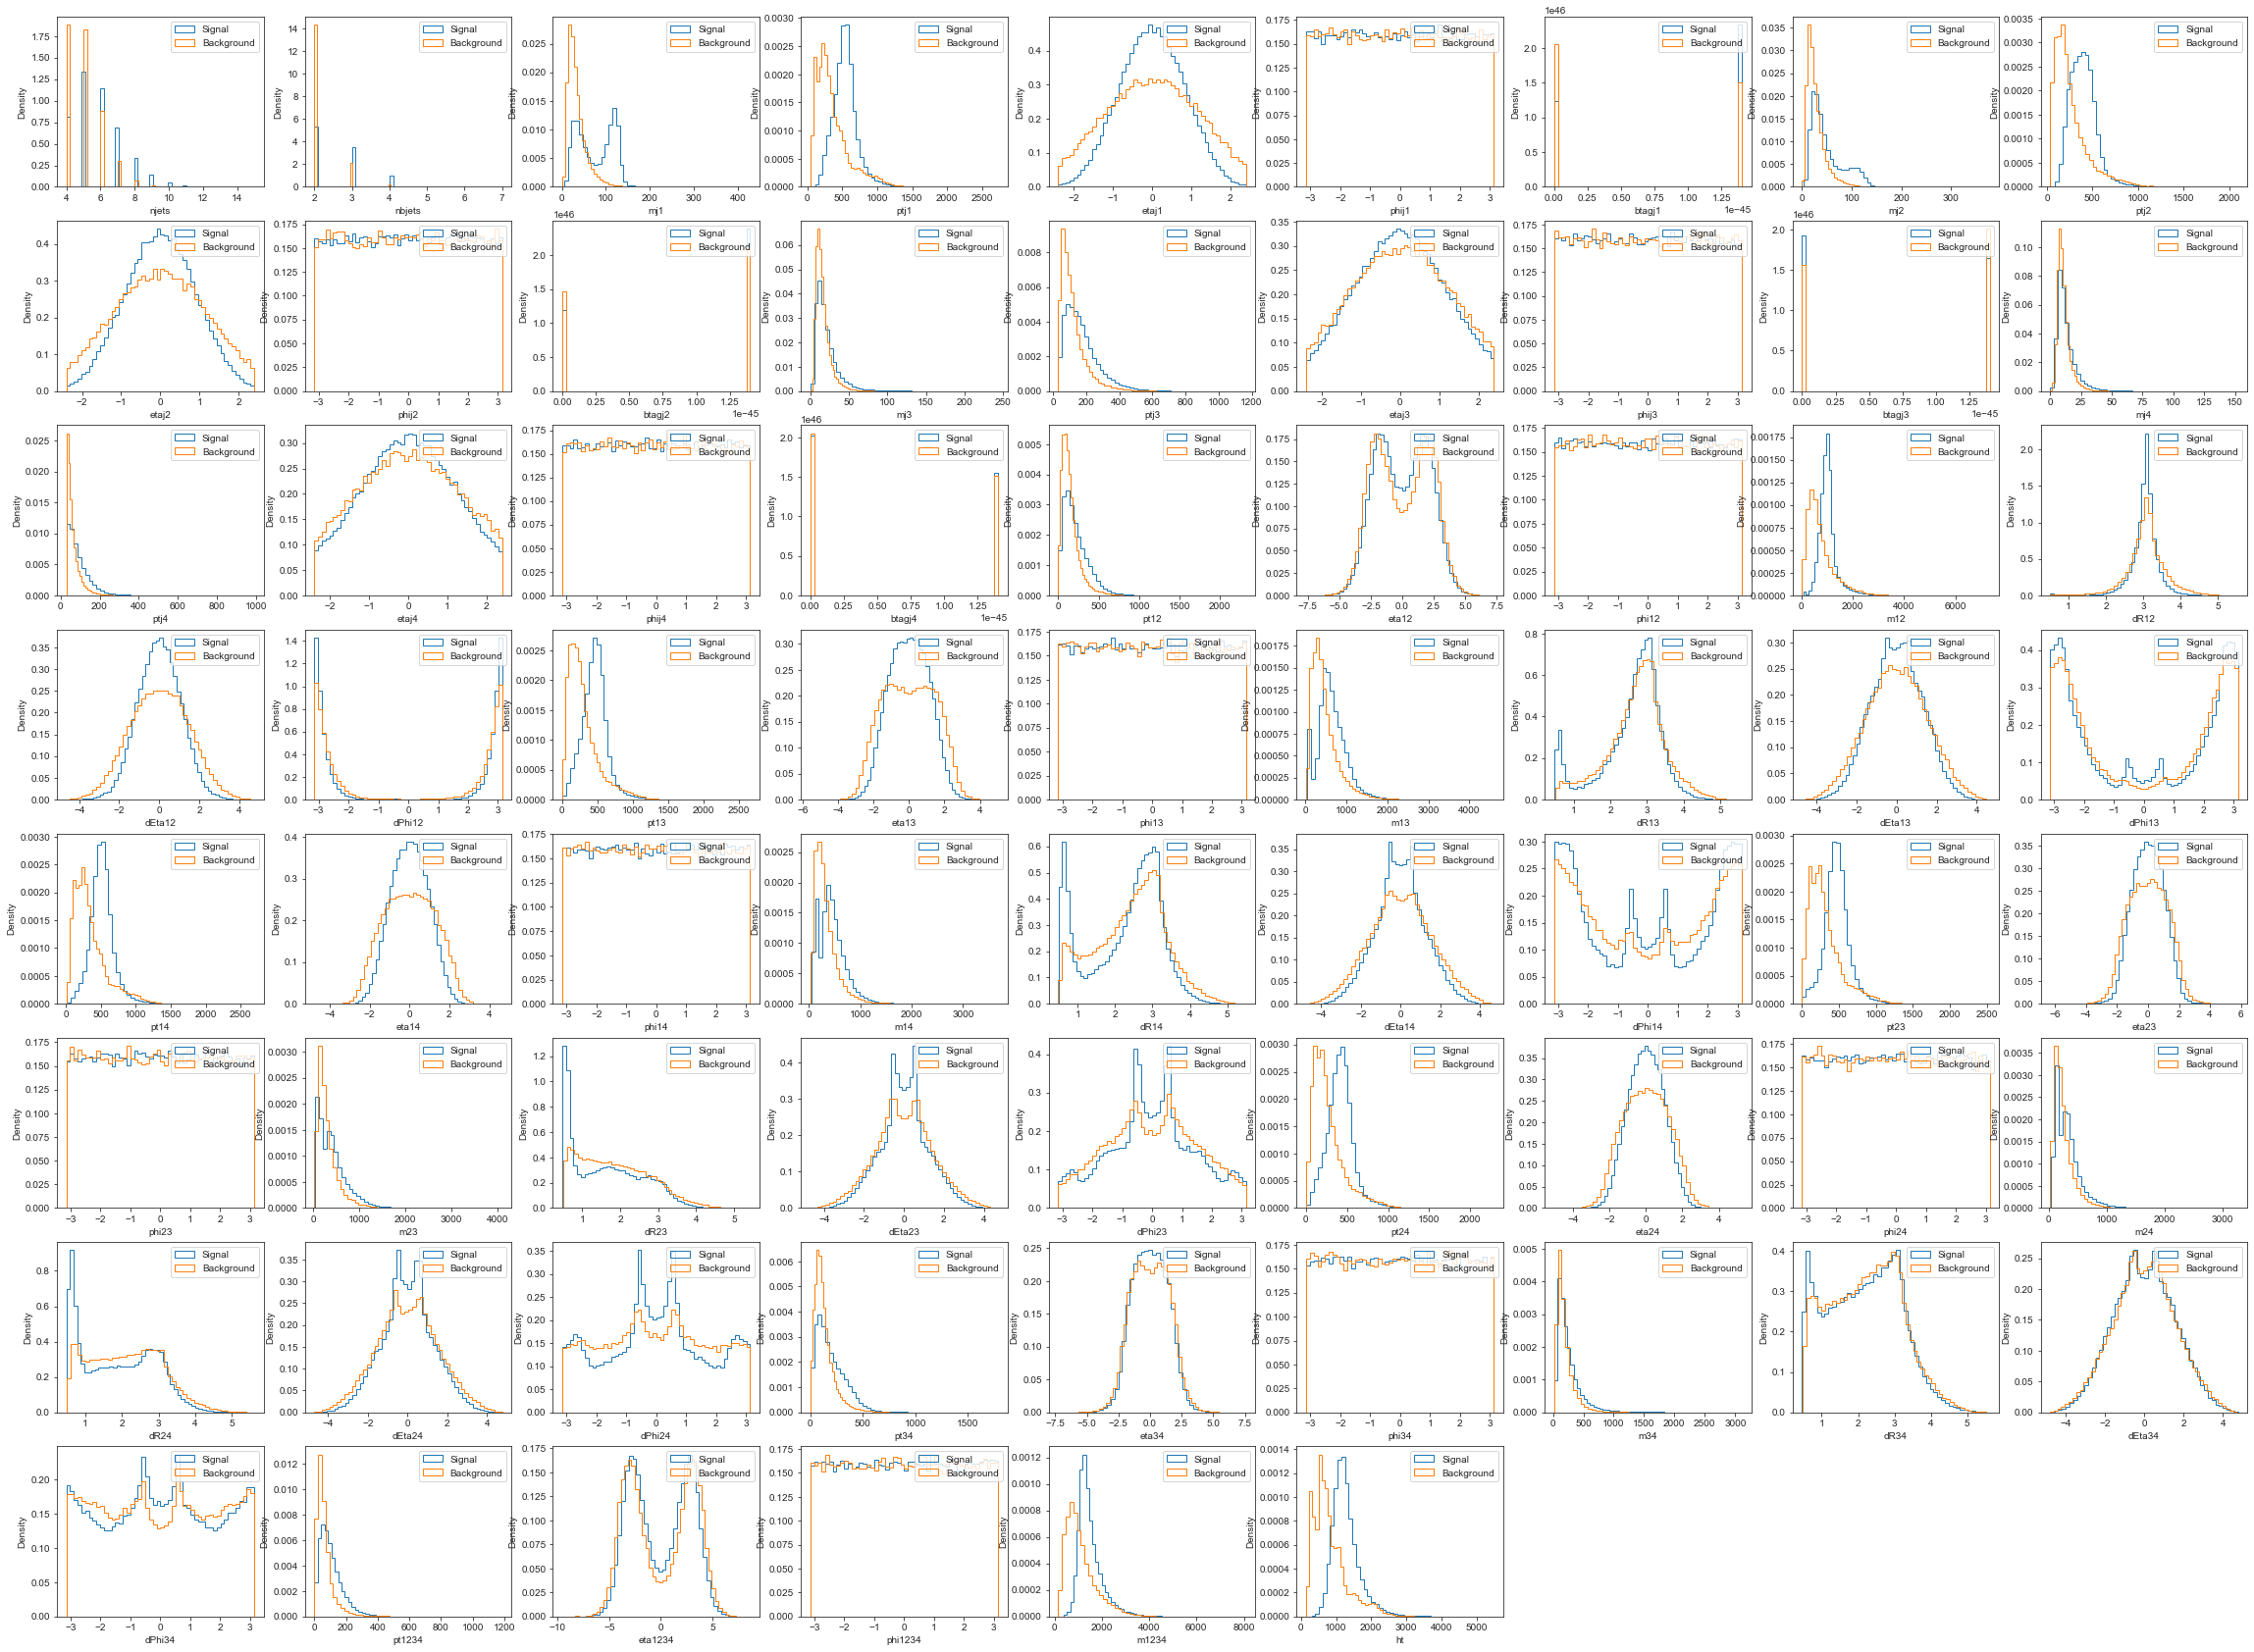

In [533]:
#%%
All_Hist(data, bins=50, density=True, histtype='step')

<AxesSubplot:>

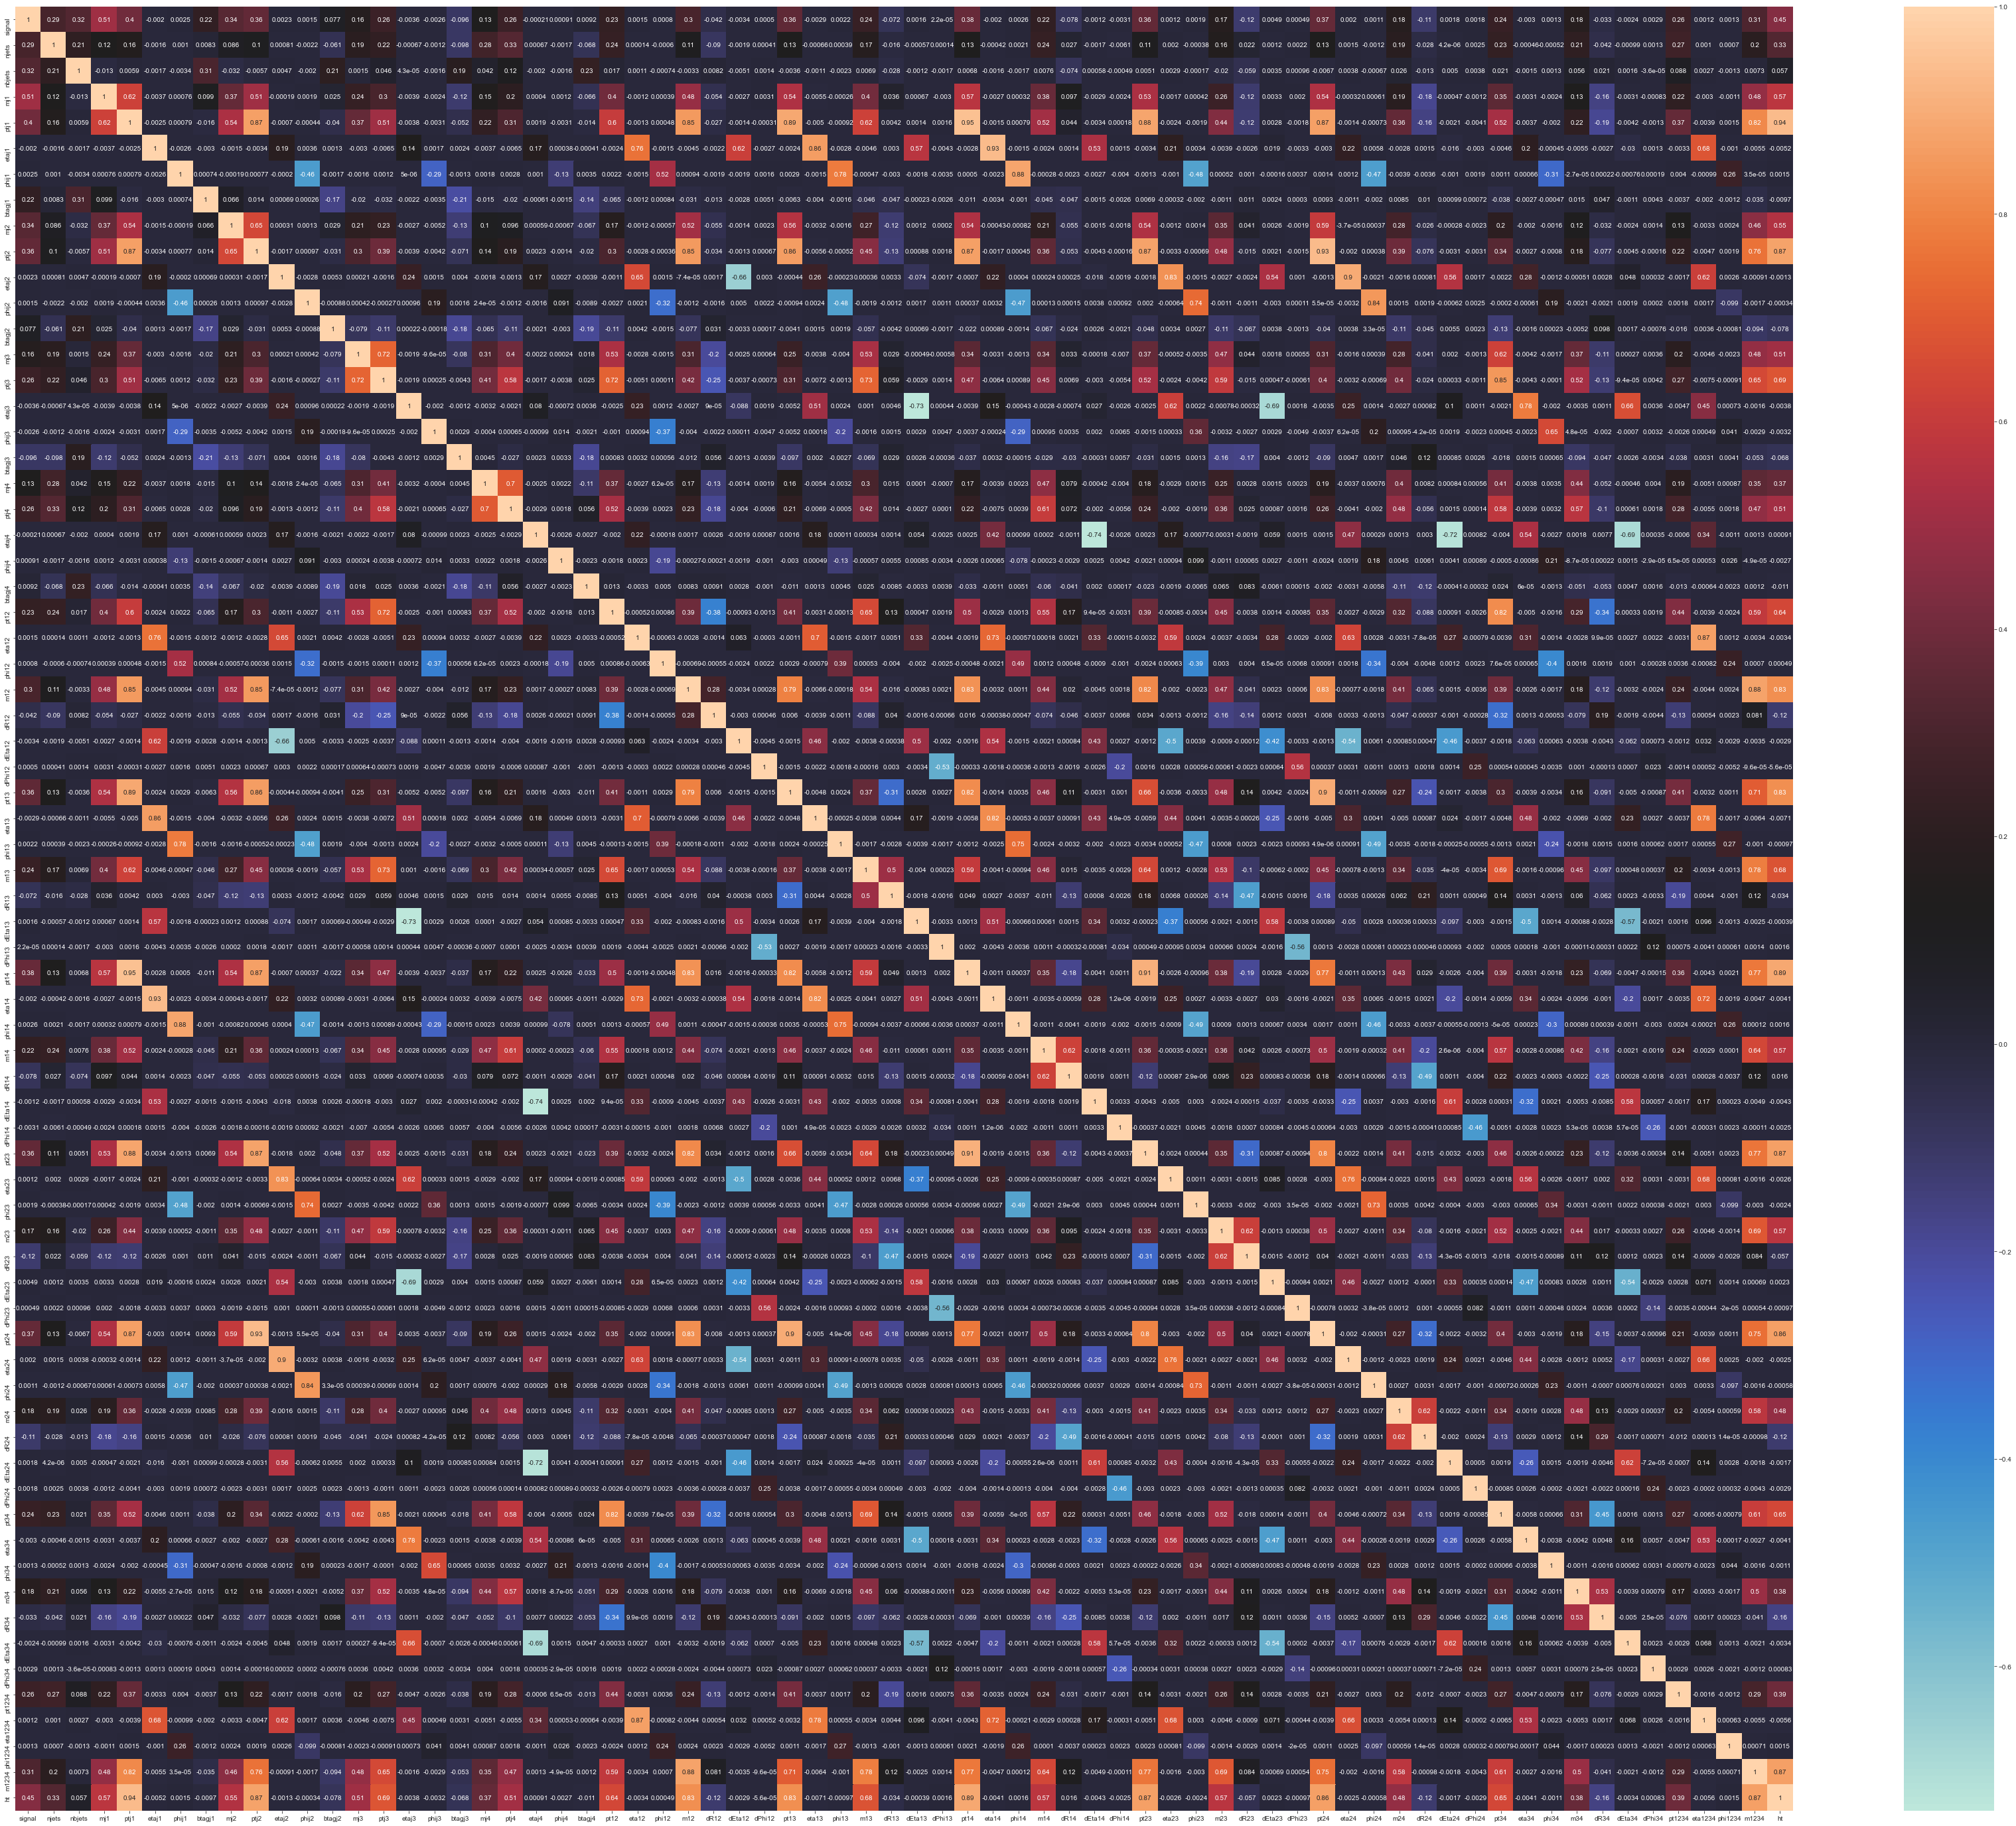

In [1652]:
# sns.pairplot(data, hue ='Transported')
plt.figure(figsize=(60, 50))
sns.heatmap(data.corr(), annot=True, cmap='icefire')

(array([3.52780278e-04, 1.49669162e-03, 1.67753856e-03, 1.84531222e-03,
        1.59810853e-03, 1.26196696e-03, 9.74354962e-04, 7.38045658e-04,
        5.66508476e-04, 4.36369990e-04, 3.27426053e-04, 2.56513453e-04,
        2.11747399e-04, 1.60246628e-04, 1.23799929e-04, 9.92380232e-05,
        7.78453955e-05, 6.23951643e-05, 5.48681286e-05, 3.76351785e-05,
        2.87215836e-05, 2.21849473e-05, 1.76291099e-05, 1.40636720e-05,
        1.12905535e-05, 7.92319547e-06, 8.12127535e-06, 8.12127535e-06,
        4.95199717e-06, 5.34815694e-06, 4.15967762e-06, 1.78271898e-06,
        1.18847932e-06, 1.98079887e-06, 1.58463909e-06, 1.98079887e-06,
        5.94239660e-07, 1.78271898e-06, 9.90399433e-07, 3.96159773e-07,
        3.96159773e-07, 7.92319547e-07, 3.96159773e-07, 5.94239660e-07,
        1.98079887e-07, 1.98079887e-07, 1.98079887e-07, 0.00000000e+00,
        0.00000000e+00, 1.98079887e-07]),
 array([  25.35758018,  105.31178112,  185.26598206,  265.22018299,
         345.17438393,  42

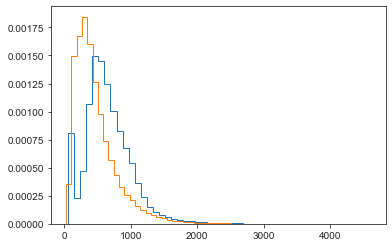

In [1300]:
bins=50
density=True
histtype='step'

plt.hist(data[data['signal'] == 1.0]['m13'], bins=bins, density=density, histtype=histtype, label='Signal')
plt.hist(data[data['signal'] == 0.0]['m13'], bins=bins, density=density, histtype=histtype, label='Background')

In [429]:
# def NN_model(input_dim, output_dim, hidden_layers, neurons, dropout_rate, learning_rate):

#     inputs = Input((input_dim,))
#     hidden = Dense(neurons, activation='relu')(inputs)
#     hidden = Dropout(dropout_rate)(hidden)
#     for i in range(hidden_layers-1):
#         hidden = Dense(neurons, activation='relu')(hidden)
#         hidden = Dropout(dropout_rate)(hidden)
#     outputs = Dense(output_dim, activation='sigmoid')(hidden)

#     model = Model(inputs=inputs, outputs=outputs)

#     model.compile(loss='binary_crossentropy', 
#                   #optimizer='adam'
#                   optimizer=Adam(learning_rate=learning_rate), 
#                   metrics=['accuracy', AUC(from_logits=True)])1

#     return model

In [12]:
# def AdaBoost_model(n_estimators, learning_rate):

#     model = AdaBoostClassifier(n_estimators=n_estimators, 
#                                learning_rate=learning_rate)

#     return model

In [611]:
class model:
    
    # for 1st evaluation and feature importance
    def NN_model_1(input_dim):

        inputs = Input((input_dim,))
        hidden = Dense(100, activation='relu')(inputs)
        hidden = Dropout(0.1)(hidden)
        for i in range(3-1):
            hidden = Dense(100, activation='relu')(hidden)
            hidden = Dropout(0.3)(hidden)
        outputs = Dense(1, activation='sigmoid')(hidden)

        model = Model(inputs=inputs, outputs=outputs)

        model.compile(loss='binary_crossentropy', 
                    #optimizer='adam'
                    optimizer=Adam(learning_rate=0.001), 
                    metrics=['accuracy', AUC(from_logits=True)])

        return model
    
    # for hyperparameter tuning
    def NN_model_2(input_dim, output_dim, hidden_layers, neurons, dropout_rate, learning_rate):

        inputs = Input((input_dim,))
        hidden = Dense(neurons, activation='relu')(inputs)
        hidden = Dropout(dropout_rate)(hidden)
        for i in range(hidden_layers-1):
            hidden = Dense(neurons, activation='relu')(hidden)
            hidden = Dropout(dropout_rate)(hidden)
        outputs = Dense(output_dim, activation='sigmoid')(hidden)

        model = Model(inputs=inputs, outputs=outputs)

        model.compile(loss='binary_crossentropy', 
                    #optimizer='adam'
                    optimizer=Adam(learning_rate=learning_rate), 
                    metrics=['accuracy', AUC(from_logits=True)])

        return model
    
    # for 1st evaluation and feature importance
    def AdaBoost_model_1(n_estimators=100, learning_rate=1.0):

        model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)

        return model

    # for hyperparameter tuning
    def AdaBoost_model_2():
            
        model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
    
        return model

In [1192]:
def feature_importance(model, x_train, y_train, columns):

    result = permutation_importance(model, x_train, y_train, scoring='accuracy', n_repeats=10, random_state=42, n_jobs=2)
    score = result.importances_mean
    feature_selected = pd.Series(score, index=columns).sort_values(ascending=False)
    feature_selected = feature_selected[feature_selected > 0.01]
    print(len(feature_selected))
    print(list(feature_selected.index))

    feature_selected_plot = feature_selected.sort_values(ascending=True)

    fig, ax = plt.subplots(figsize=(10, 10))
    bars = ax.barh(feature_selected_plot.index, feature_selected_plot.values, color='black')

    for bar in bars:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
                '{:.2f}'.format(bar.get_width()), ha='left', va='center')

    plt.xlabel('Permutation Importance')
    plt.ylabel('Features')
    plt.title('Permutation Importance of Features')
    plt.tight_layout()
    plt.show()

    return list(feature_selected.index)


In [286]:
def hyperparameter_tuning(model, x_train, y_train, x_val, y_val, params, method='random'):
    
    if method == 'random':
        search = RandomizedSearchCV(model, params, cv=5, n_iter=10, n_jobs=-1)
    elif method == 'grid':
        search = GridSearchCV(model, params, cv=5, n_jobs=-1)
    else:
        print("Please choose either 'random' or 'grid' search.")

    result = search.fit(x_train, y_train)

    print('Best Accuracy: {} using {}'.format(result.best_score_, result.best_params_))

    y_pred = result.predict(x_val)
    y_pred = np.where(y_pred > 0.5, 1, 0)

    print("Test set accuracy: {:.2f}%".format(accuracy_score(y_val, y_pred)*100))

    means = result.cv_results_['mean_test_score']
    stds = result.cv_results_['std_test_score']
    params = result.cv_results_['params']

    for mean, stdev, param in zip(means, stds, params):
        print('{} ({}) with: {}'.format(mean, stdev, param))

In [1733]:
from sklearn.metrics import roc_auc_score

def hyperparameter_tuning_2(model, x_train, y_train, x_val, y_val, params, method='random'):
    
    if method == 'random':
        search = RandomizedSearchCV(model, params, cv=5, n_iter=10, n_jobs=-1, scoring='roc_auc')
    elif method == 'grid':
        search = GridSearchCV(model, params, cv=5, n_jobs=-1, scoring='roc_auc')
    else:
        print("Please choose either 'random' or 'grid' search.")

    result = search.fit(x_train, y_train)

    print('Best AUC: {} using {}'.format(result.best_score_, result.best_params_))

    y_pred = result.predict(x_val)
    y_pred = np.where(y_pred > 0.5, 1, 0)

    print("Test set AUC: {:.2f}%".format(roc_auc_score(y_val, y_pred)*100))

    means = result.cv_results_['mean_test_score']
    stds = result.cv_results_['std_test_score']
    params = result.cv_results_['params']

    for mean, stdev, param in zip(means, stds, params):
        print('{} ({}) with: {}'.format(mean, stdev, param))


In [1730]:
class result:

    # set weight and luminosity as parameters
    # change efficiency plot(threshold) for AdaBoost
    # change ylim of significance plot
    # change significant calculation for 2 luminosity
    def evaluate(model, x_train, y_train, x_test, y_test, x_test_ht, model_type, predict_type='predict_proba', bins=50):

        try:
            # this case cannot work with KerasClassifier
            Classifier_train_S = model.decision_function(x_train[y_train > 0.5]).ravel()
            Classifier_train_B = model.decision_function(x_train[y_train < 0.5]).ravel()
            Classifier_test_S = model.decision_function(x_test[y_test > 0.5]).ravel()
            Classifier_test_B = model.decision_function(x_test[y_test < 0.5]).ravel()

            ranges = (-1, 1)

        except:
            Classifier_train_S = model.predict_proba(x_train[y_train > 0.5])[:, 1].ravel()
            Classifier_train_B = model.predict_proba(x_train[y_train < 0.5])[:, 1].ravel()
            Classifier_test_S = model.predict_proba(x_test[y_test > 0.5])[:, 1].ravel()
            Classifier_test_B = model.predict_proba(x_test[y_test < 0.5])[:, 1].ravel()
            
            ranges = (0, 1)

        #bins = 50
        density = True
        histtype = 'stepfilled'

        hist_train_S = np.histogram(Classifier_train_S, bins=bins,range=ranges, density=density)
        hist_train_B = np.histogram(Classifier_train_B, bins=bins,range=ranges, density=density)
        hist_test_S = np.histogram(Classifier_test_S, bins=bins,range=ranges, density=density)
        hist_test_B = np.histogram(Classifier_test_B, bins=bins,range=ranges, density=density)

        n_bootstraps = 1000
        bootstrapped_means_train_S = []
        bootstrapped_means_train_B = []
        for i in range(n_bootstraps):

            resampled_train_S = np.random.choice(Classifier_train_S, size=len(Classifier_train_S), replace=True)
            resampled_train_B = np.random.choice(Classifier_train_B, size=len(Classifier_train_B), replace=True)
            
            height_train_S, _ = np.histogram(resampled_train_S, bins=bins, density=density)
            height_train_B, _ = np.histogram(resampled_train_B, bins=bins, density=density)
            
            bootstrapped_means_train_S.append(height_train_S)
            bootstrapped_means_train_B.append(height_train_B)
            
        bootstrapped_means_train_S = np.array(bootstrapped_means_train_S)
        bootstrapped_means_train_B = np.array(bootstrapped_means_train_B)
        stderr_train_S = np.std(bootstrapped_means_train_S, axis=0) / np.sqrt(n_bootstraps)
        stderr_train_B = np.std(bootstrapped_means_train_B, axis=0) / np.sqrt(n_bootstraps)

        bin_edges = hist_test_S[1]
        bin_widths = bin_edges[1:] - bin_edges[:-1]
        bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

        # Classifier plot
        plt.figure(figsize=(10, 6))
        plt.hist(Classifier_test_S, bins=bins, range=ranges, density=density, histtype=histtype, label='Signal (Test)', color='r', alpha=0.5)
        plt.hist(Classifier_test_B, bins=bins, range=ranges, density=density, histtype=histtype, label='Background (Test)', color='b', alpha=0.5)

        plt.errorbar(bin_centers, hist_train_S[0], yerr=stderr_train_S, xerr=None,
                    ecolor='r', c='r', fmt='o', markersize=5, label='Signal (Train)')
        plt.errorbar(bin_centers, hist_train_B[0], yerr=stderr_train_B, xerr=None,
                    ecolor='b', c='b', fmt='o', markersize=5, label='Background (Train)')

        plt.xlabel(f'{model_type} Classifier')
        plt.ylabel('Density')
        plt.legend(loc='upper center' if 'NN' in model_type else 'upper right')
        plt.show()

        if predict_type == 'predict_proba':
            # KerenasClassifier use this
            # range(0, 1)
            y_pred = model.predict_proba(x_test)[:, 1]

        elif predict_type == 'decision_function':
            # AdaBoostClassifier use this (only use with Adaboost)
            # range(-1, 1)
            y_pred = model.decision_function(x_test)

        elif predict_type == 'predict': 
            # this case cannot show smooth roc_curve
            # only 0 or 1
            y_pred = model.predict(x_test)

        else:
            print("predict_type must be 'predict_proba', 'decision_function', or 'predict'")

        fpr, tpr, thresholds = roc_curve(y_test, y_pred)

        auc_ = auc(fpr, tpr)

        # ROC curve with AUC
        # plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label='AUC = '+str(auc_))
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc='best')
        plt.show()

        # # Efficiency vs Cut value
        # plt.plot(thresholds, tpr, label='Signal Efficiency')
        # plt.plot(thresholds, fpr, label='Background Efficiency') 
        # plt.ylabel('Efficiency')
        # plt.xlabel('Cut value')
        # plt.title('Efficiency vs Cut value')
        # plt.legend(loc='best')
        # plt.show()

        # fig, ax1 = plt.subplots()
        # ax1.plot(thresholds, tpr, color='b', label='Signal Efficiency')
        # ax1.plot(thresholds, fpr, color='r', label='Background Efficiency')
        # ax1.set_ylabel('Efficiency')
        # ax1.set_xlabel('Cut value')

        ########################################################

        weight_QCD_CrossSection = [80430.0/600000, # HT200to300
                                   16620.0/500000, # HT300to500
                                   1487.0/700000,  # HT500to700
                                   296.5/700000,   # HT700to1000
                                   46.61/600000,   # HT1000to1500
                                   3.72/600000,    # HT1500to2000
                                   0.6462/600000]  # HT2000toInf

        # weight_QCD_CrossSection = [1, 1, 1, 1, 1, 1, 1]

        luminosity = 3000000 # pb-1
        
        significance_ = []
        cut_values = np.linspace(np.floor(np.min(y_pred)), 1, 1000)
        
        for cut in cut_values:
        
            n_background_HT200to300 = np.sum((y_pred <= cut) & (x_test_ht >= 200) & (x_test_ht < 300)) * weight_QCD_CrossSection[0]
            n_background_HT300to500 = np.sum((y_pred <= cut) & (x_test_ht >= 300) & (x_test_ht < 500)) * weight_QCD_CrossSection[1]
            n_background_HT500to700 = np.sum((y_pred <= cut) & (x_test_ht >= 500) & (x_test_ht < 700)) * weight_QCD_CrossSection[2]
            n_background_HT700to1000 = np.sum((y_pred <= cut) & (x_test_ht >= 700) & (x_test_ht < 1000)) * weight_QCD_CrossSection[3]
            n_background_HT1000to1500 = np.sum((y_pred <= cut) & (x_test_ht >= 1000) & (x_test_ht < 1500)) * weight_QCD_CrossSection[4]
            n_background_HT1500to2000 = np.sum((y_pred <= cut) & (x_test_ht >= 1500) & (x_test_ht < 2000)) * weight_QCD_CrossSection[5]
            n_background_HT2000toInf = np.sum((y_pred <= cut) & (x_test_ht >= 2000)) * weight_QCD_CrossSection[6]

            n_background_pred_weight = (n_background_HT200to300 + n_background_HT300to500 + 
                                        n_background_HT500to700 + n_background_HT700to1000 + 
                                        n_background_HT1000to1500 + n_background_HT1500to2000 +
                                        n_background_HT2000toInf) * luminosity
        
            n_signal_pred_weight = np.sum(y_pred > cut) * (1.0/300000) * luminosity

            significance_.append(n_signal_pred_weight / np.sqrt(n_background_pred_weight if n_background_pred_weight > 0 else 1/1000))
        
        # plt.plot(cut_values, significance_)
        # plt.ylabel('Significance')
        # plt.xlabel('Cut value')
        # plt.title('Significance vs Cut value')
        # plt.show()
        # print(len(thresholds), np.max(thresholds), np.min(thresholds))
        fig, ax1 = plt.subplots()
        ax1.plot(thresholds, tpr, color='b', label='Signal Efficiency')
        ax1.plot(thresholds, fpr, color='r', label='Background Efficiency')
        ax1.set_ylabel('Efficiency')
        ax1.set_xlabel('Cut value')

        ax2 = ax1.twinx()
        ax2.plot(cut_values, significance_, color='g', label='Significance')
        #ax2.set_ylim([0.0, 6.0])
        ax2.set_ylabel('Significance', color='g')
        ax2.tick_params(axis='y', colors='g')
        lines_1, labels_1 = ax1.get_legend_handles_labels()
        lines_2, labels_2 = ax2.get_legend_handles_labels()
        plt.xlim(ranges)
        plt.title('Cut Efficiency and Optimal cut value')
        plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')
        plt.show()

        ########################################################
        
        # rough cut
        if predict_type == 'decision_function':
            cut_value = 0.0
            y_pred = np.where(y_pred > cut_value, 1, 0)
        else:
            cut_value = 0.5
            y_pred = np.where(y_pred > cut_value, 1, 0)

        # Scores
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)

        # Confusion matrix plot
        # plt.figure(figsize=(6, 4)
        ax = sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
        ax.set(xlabel='Predicted', ylabel='Actual')
        plt.show()

        print(f'Accuracy: {acc}')
        print(f'F1-Score: {f1}')
        print(cm)
        print(cr)
        #print(len(thresholds), thresholds)

        ################################################################################################################################

        weight_QCD_CrossSection = [80430.0/600000, # HT200to300
                                   16620.0/500000, # HT300to500
                                   1487.0/700000,  # HT500to700
                                   296.5/700000,   # HT700to1000
                                   46.61/600000,   # HT1000to1500
                                   3.72/600000,    # HT1500to2000
                                   0.6462/600000]  # HT2000toInf

        n_background_HT200to300 = np.sum((y_pred == 0) & (x_test_ht >= 200) & (x_test_ht < 300)) * weight_QCD_CrossSection[0]
        n_background_HT300to500 = np.sum((y_pred == 0) & (x_test_ht >= 300) & (x_test_ht < 500)) * weight_QCD_CrossSection[1]
        n_background_HT500to700 = np.sum((y_pred == 0) & (x_test_ht >= 500) & (x_test_ht < 700)) * weight_QCD_CrossSection[2]
        n_background_HT700to1000 = np.sum((y_pred == 0) & (x_test_ht >= 700) & (x_test_ht < 1000)) * weight_QCD_CrossSection[3]
        n_background_HT1000to1500 = np.sum((y_pred == 0) & (x_test_ht >= 1000) & (x_test_ht < 1500)) * weight_QCD_CrossSection[4]
        n_background_HT1500to2000 = np.sum((y_pred == 0) & (x_test_ht >= 1500) & (x_test_ht < 2000)) * weight_QCD_CrossSection[5]
        n_background_HT2000toInf = np.sum((y_pred == 0) & (x_test_ht >= 2000)) * weight_QCD_CrossSection[6]

        n_background_pred_weight = (n_background_HT200to300 + n_background_HT300to500 + 
                                    n_background_HT500to700 + n_background_HT700to1000 + 
                                    n_background_HT1000to1500 + n_background_HT1500to2000 +
                                    n_background_HT2000toInf) * luminosity
        
        n_signal_pred_weight = np.sum(y_pred == 1) * (1.0/300000) * luminosity

        print(f'n_background_HT200to300: {n_background_HT200to300}')
        print(f'n_background_HT300to500: {n_background_HT300to500}')
        print(f'n_background_HT500to700: {n_background_HT500to700}')
        print(f'n_background_HT700to1000: {n_background_HT700to1000}')
        print(f'n_background_HT1000to1500: {n_background_HT1000to1500}')
        print(f'n_background_HT1500to2000: {n_background_HT1500to2000}')
        print(f'n_background_HT2000toInf: {n_background_HT2000toInf}')
        print(f'n_background_pred_weight: {n_background_pred_weight}')
        print(f'n_signal_pred_weight: {n_signal_pred_weight}')
        
        significance = n_signal_pred_weight / np.sqrt(n_background_pred_weight)
        
        print(f'Significance for {luminosity} pb-1: {significance}')

        ################################################################################################################################


    def final_evaluate(model, x_train, y_train, x_test, y_test, model_type, predict_type='predict_proba', bins=50):

        try:
            # this case cannot work with KerasClassifier
            Classifier_train_S = model.decision_function(x_train[y_train > 0.5]).ravel()
            Classifier_train_B = model.decision_function(x_train[y_train < 0.5]).ravel()
            Classifier_test_S = model.decision_function(x_test[y_test > 0.5]).ravel()
            Classifier_test_B = model.decision_function(x_test[y_test < 0.5]).ravel()

            ranges = (-1, 1)

        except:
            Classifier_train_S = model.predict_proba(x_train[y_train > 0.5])[:, 1].ravel()
            Classifier_train_B = model.predict_proba(x_train[y_train < 0.5])[:, 1].ravel()
            Classifier_test_S = model.predict_proba(x_test[y_test > 0.5])[:, 1].ravel()
            Classifier_test_B = model.predict_proba(x_test[y_test < 0.5])[:, 1].ravel()

            ranges = (0, 1)

        #bins = 50
        density = True
        histtype = 'stepfilled'

        hist_train_S = np.histogram(Classifier_train_S, bins=bins,range=ranges, density=density)
        hist_train_B = np.histogram(Classifier_train_B, bins=bins,range=ranges, density=density)
        hist_test_S = np.histogram(Classifier_test_S, bins=bins,range=ranges, density=density)
        hist_test_B = np.histogram(Classifier_test_B, bins=bins,range=ranges, density=density)

        n_bootstraps = 1000
        bootstrapped_means_test_S = []
        bootstrapped_means_test_B = []
        for i in range(n_bootstraps):

            resampled_test_S = np.random.choice(Classifier_test_S, size=len(Classifier_test_S), replace=True)
            resampled_test_B = np.random.choice(Classifier_test_B, size=len(Classifier_test_B), replace=True)
            
            height_test_S, _ = np.histogram(resampled_test_S, bins=bins, density=density)
            height_test_B, _ = np.histogram(resampled_test_B, bins=bins, density=density)
            
            bootstrapped_means_test_S.append(height_test_S)
            bootstrapped_means_test_B.append(height_test_B)
            
        bootstrapped_means_test_S = np.array(bootstrapped_means_test_S)
        bootstrapped_means_test_B = np.array(bootstrapped_means_test_B)
        stderr_test_S = np.std(bootstrapped_means_test_S, axis=0) / np.sqrt(n_bootstraps)
        stderr_test_B = np.std(bootstrapped_means_test_B, axis=0) / np.sqrt(n_bootstraps)

        bin_edges = hist_train_S[1]
        bin_widths = bin_edges[1:] - bin_edges[:-1]
        bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

        # Classifier plot
        plt.figure(figsize=(10, 6))
        plt.hist(Classifier_train_S, bins=bins, range=ranges, density=density, histtype=histtype, label='Signal (Train)', color='r', alpha=0.5)
        plt.hist(Classifier_train_B, bins=bins, range=ranges, density=density, histtype=histtype, label='Background (Train)', color='b', alpha=0.5)

        plt.errorbar(bin_centers, hist_test_S[0], yerr=stderr_test_S, xerr=None,
                    ecolor='r', c='r', fmt='o', markersize=5, label='Signal (Test)')
        plt.errorbar(bin_centers, hist_test_B[0], yerr=stderr_test_B, xerr=None,
                    ecolor='b', c='b', fmt='o', markersize=5, label='Background (Test)')

        plt.xlabel(f'{model_type} Classifier')
        plt.ylabel('Density')
        plt.legend(loc='best')
        plt.show()

        if predict_type == 'predict_proba':
            # KerenasClassifier use this
            # range(0, 1)
            y_pred = model.predict_proba(x_test)[:, 1]

        elif predict_type == 'decision_function':
            # AdaBoostClassifier use this (only use with Adaboost)
            # range(-1, 1)
            y_pred = model.decision_function(x_test)

        elif predict_type == 'predict': 
            # this case cannot show smooth roc_curve
            # only 0 or 1
            y_pred = model.predict(x_test)

        else:
            print("predict_type must be 'predict_proba', 'decision_function', or 'predict'")

        fpr, tpr, thresholds = roc_curve(y_test, y_pred)

        auc_ = auc(fpr, tpr)

        # ROC curve with AUC
        # plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label='AUC = '+str(auc_))
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc='best')
        plt.show()

        # Efficiency vs Cut value
        plt.plot(thresholds, tpr, label='Signal Efficiency')
        plt.plot(thresholds, fpr, label='Background Efficiency')
        plt.ylabel('Efficiency')
        plt.xlabel('Cut value')
        plt.title('Efficiency vs Cut value')
        plt.legend(loc='best')
        plt.show()
        
        # should I weight the signal and background?

        # x_test_ht = StandardScaler().inverse_transform(x_test)[:, -1]

        weight_QCD_CrossSection = [80430.0/600000, # HT200to300
                                   16620.0/500000, # HT300to500
                                   1487.0/700000,  # HT500to700
                                   296.5/700000,   # HT700to1000
                                   46.61/600000,   # HT1000to1500
                                   3.72/600000,    # HT1500to2000
                                   0.6462/600000]  # HT2000toInf
        
        significance_ = []
        cut_values = np.linspace(np.min(y_pred), np.max(y_pred), 100) # also call 'thesholds'
        
        for cut in cut_values:

            n_background_HT200to300 = np.sum((y_pred <= cut) & (x_test_ht >= 200) & (x_test_ht < 300)) * weight_QCD_CrossSection[0]
            n_background_HT300to500 = np.sum((y_pred <= cut) & (x_test_ht >= 300) & (x_test_ht < 500)) * weight_QCD_CrossSection[1]
            n_background_HT500to700 = np.sum((y_pred <= cut) & (x_test_ht >= 500) & (x_test_ht < 700)) * weight_QCD_CrossSection[2]
            n_background_HT700to1000 = np.sum((y_pred <= cut) & (x_test_ht >= 700) & (x_test_ht < 1000)) * weight_QCD_CrossSection[3]
            n_background_HT1000to1500 = np.sum((y_pred <= cut) & (x_test_ht >= 1000) & (x_test_ht < 1500)) * weight_QCD_CrossSection[4]
            n_background_HT1500to2000 = np.sum((y_pred <= cut) & (x_test_ht >= 1500) & (x_test_ht < 2000)) * weight_QCD_CrossSection[5]
            n_background_HT2000toInf = np.sum((y_pred <= cut) & (x_test_ht >= 2000)) * weight_QCD_CrossSection[6]

            n_background_pred_weight = (n_background_HT200to300 + n_background_HT300to500 + 
                                        n_background_HT500to700 + n_background_HT700to1000 + 
                                        n_background_HT1000to1500 + n_background_HT1500to2000 +
                                        n_background_HT2000toInf)
        
            n_signal_pred_weight = np.sum(y_pred > cut) * (1.0/300000)

            significance_.append(n_signal_pred_weight / np.sqrt(n_signal_pred_weight + n_background_pred_weight))
        
        plt.plot(cut_values, significance_)
        plt.ylabel('Significance')
        plt.xlabel('Cut value')
        plt.title('Significance vs Cut value')
        plt.show()

        print('*****************************************************************************************************************************')
        print('This below is rough calculation for the final evaluation, because it assumes the cut value == 0.5 for NN and 0.0 for Adaboost')
        print('for the correct calculation use "result.stat_analysis() to adjust the cut value')
        print('*****************************************************************************************************************************')

        # rough cut
        if predict_type == 'decision_function':
            cut_value = 0.0
            y_pred = np.where(y_pred > cut_value, 1, 0)
        else:
            cut_value = 0.5
            y_pred = np.where(y_pred > cut_value, 1, 0)

        # Scores
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)

        # Confusion matrix plot
        # plt.figure(figsize=(6, 4)
        ax = sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
        ax.set(xlabel='Predicted', ylabel='Actual')
        plt.show()

        print(f'Accuracy: {acc}')
        print(f'F1-Score: {f1}')
        print(cm)
        print(cr)

        n_signal = np.sum(y_test == 1)
        n_background = np.sum(y_test == 0)
        n_signal_pred = np.sum(y_pred == 1)
        n_background_pred = np.sum(y_pred == 0)
        
        significance = n_signal_pred / np.sqrt(n_signal_pred + n_background_pred)
        
        print(f'Significance: {significance}')

        return y_pred
    
    def stat_analysis(x_test, y_test, y_pred, cut_value):

        y_pred = np.where(y_pred > cut_value, 1, 0)

        # Scores
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)

        # Confusion matrix plot
        # plt.figure(figsize=(6, 4)
        ax = sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
        ax.set(xlabel='Predicted', ylabel='Actual')
        plt.show()

        print(f'Accuracy: {acc}')
        print(f'F1-Score: {f1}')
        print(cm)
        print(cr)

        x_test_ht = StandardScaler().inverse_transform(x_test)[:, -1]

        weight_QCD_CrossSection = [80430.0/600000, # HT200to300
                                   16620.0/500000, # HT300to500
                                   1487.0/700000,  # HT500to700
                                   296.5/700000,   # HT700to1000
                                   46.61/600000,   # HT1000to1500
                                   3.72/600000,    # HT1500to2000
                                   0.6462/600000]  # HT2000toInf

        n_background_HT200to300 = np.sum((y_pred == 0) & (x_test_ht >= 200) & (x_test_ht < 300)) * weight_QCD_CrossSection[0]
        n_background_HT300to500 = np.sum((y_pred == 0) & (x_test_ht >= 300) & (x_test_ht < 500)) * weight_QCD_CrossSection[1]
        n_background_HT500to700 = np.sum((y_pred == 0) & (x_test_ht >= 500) & (x_test_ht < 700)) * weight_QCD_CrossSection[2]
        n_background_HT700to1000 = np.sum((y_pred == 0) & (x_test_ht >= 700) & (x_test_ht < 1000)) * weight_QCD_CrossSection[3]
        n_background_HT1000to1500 = np.sum((y_pred == 0) & (x_test_ht >= 1000) & (x_test_ht < 1500)) * weight_QCD_CrossSection[4]
        n_background_HT1500to2000 = np.sum((y_pred == 0) & (x_test_ht >= 1500) & (x_test_ht < 2000)) * weight_QCD_CrossSection[5]
        n_background_HT2000toInf = np.sum((y_pred == 0) & (x_test_ht >= 2000)) * weight_QCD_CrossSection[6]

        n_background_pred_weight = (n_background_HT200to300 + n_background_HT300to500 + 
                                    n_background_HT500to700 + n_background_HT700to1000 + 
                                    n_background_HT1000to1500 + n_background_HT1500to2000 +
                                    n_background_HT2000toInf)
        
        n_signal_pred_weight = np.sum(y_pred == 1) * (1.0/300000)
        
        significance = n_signal_pred_weight / np.sqrt(n_signal_pred_weight + n_background_pred_weight)
        
        print(f'Significance: {significance}')

        return significance

In [1750]:
class result:

    # set weight and luminosity as parameters
    # change efficiency plot(threshold) for AdaBoost
    # change ylim of significance plot
    # change significant calculation for 2 luminosity
    def evaluate(model, x_train, y_train, x_test, y_test, x_test_ht, model_type, predict_type='predict_proba', bins=50):

        try:
            # this case cannot work with KerasClassifier
            Classifier_train_S = model.decision_function(x_train[y_train > 0.5]).ravel()
            Classifier_train_B = model.decision_function(x_train[y_train < 0.5]).ravel()
            Classifier_test_S = model.decision_function(x_test[y_test > 0.5]).ravel()
            Classifier_test_B = model.decision_function(x_test[y_test < 0.5]).ravel()

            ranges = (-1, 1)

        except:
            Classifier_train_S = model.predict_proba(x_train[y_train > 0.5])[:, 1].ravel()
            Classifier_train_B = model.predict_proba(x_train[y_train < 0.5])[:, 1].ravel()
            Classifier_test_S = model.predict_proba(x_test[y_test > 0.5])[:, 1].ravel()
            Classifier_test_B = model.predict_proba(x_test[y_test < 0.5])[:, 1].ravel()
            
            ranges = (0, 1)

        #bins = 50
        density = True
        histtype = 'stepfilled'

        hist_train_S = np.histogram(Classifier_train_S, bins=bins,range=ranges, density=density)
        hist_train_B = np.histogram(Classifier_train_B, bins=bins,range=ranges, density=density)
        hist_test_S = np.histogram(Classifier_test_S, bins=bins,range=ranges, density=density)
        hist_test_B = np.histogram(Classifier_test_B, bins=bins,range=ranges, density=density)

        n_bootstraps = 1000
        bootstrapped_means_train_S = []
        bootstrapped_means_train_B = []
        for i in range(n_bootstraps):

            resampled_train_S = np.random.choice(Classifier_train_S, size=len(Classifier_train_S), replace=True)
            resampled_train_B = np.random.choice(Classifier_train_B, size=len(Classifier_train_B), replace=True)
            
            height_train_S, _ = np.histogram(resampled_train_S, bins=bins, density=density)
            height_train_B, _ = np.histogram(resampled_train_B, bins=bins, density=density)
            
            bootstrapped_means_train_S.append(height_train_S)
            bootstrapped_means_train_B.append(height_train_B)
            
        bootstrapped_means_train_S = np.array(bootstrapped_means_train_S)
        bootstrapped_means_train_B = np.array(bootstrapped_means_train_B)
        stderr_train_S = np.std(bootstrapped_means_train_S, axis=0) / np.sqrt(n_bootstraps)
        stderr_train_B = np.std(bootstrapped_means_train_B, axis=0) / np.sqrt(n_bootstraps)

        bin_edges = hist_test_S[1]
        bin_widths = bin_edges[1:] - bin_edges[:-1]
        bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

        # Classifier plot
        plt.figure(figsize=(10, 6))
        plt.hist(Classifier_test_S, bins=bins, range=ranges, density=density, histtype=histtype, label='Signal (Test)', color='r', alpha=0.5)
        plt.hist(Classifier_test_B, bins=bins, range=ranges, density=density, histtype=histtype, label='Background (Test)', color='b', alpha=0.5)

        plt.errorbar(bin_centers, hist_train_S[0], yerr=stderr_train_S, xerr=None,
                    ecolor='r', c='r', fmt='o', markersize=5, label='Signal (Train)')
        plt.errorbar(bin_centers, hist_train_B[0], yerr=stderr_train_B, xerr=None,
                    ecolor='b', c='b', fmt='o', markersize=5, label='Background (Train)')

        plt.xlabel(f'{model_type} Classifier')
        plt.ylabel('Density')
        plt.legend(loc='upper center' if 'NN' in model_type else 'upper right')
        plt.show()

        if predict_type == 'predict_proba':
            # KerenasClassifier use this
            # range(0, 1)
            y_pred = model.predict_proba(x_test)[:, 1]

        elif predict_type == 'decision_function':
            # AdaBoostClassifier use this (only use with Adaboost)
            # range(-1, 1)
            y_pred = model.decision_function(x_test)

        elif predict_type == 'predict': 
            # this case cannot show smooth roc_curve
            # only 0 or 1
            y_pred = model.predict(x_test)

        else:
            print("predict_type must be 'predict_proba', 'decision_function', or 'predict'")

        fpr, tpr, thresholds = roc_curve(y_test, y_pred)

        auc_ = auc(fpr, tpr)

        # ROC curve with AUC
        # plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label='AUC = '+str(auc_))
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc='best')
        plt.show()

        # # Efficiency vs Cut value
        # plt.plot(thresholds, tpr, label='Signal Efficiency')
        # plt.plot(thresholds, fpr, label='Background Efficiency') 
        # plt.ylabel('Efficiency')
        # plt.xlabel('Cut value')
        # plt.title('Efficiency vs Cut value')
        # plt.legend(loc='best')
        # plt.show()

        # fig, ax1 = plt.subplots()
        # ax1.plot(thresholds, tpr, color='b', label='Signal Efficiency')
        # ax1.plot(thresholds, fpr, color='r', label='Background Efficiency')
        # ax1.set_ylabel('Efficiency')
        # ax1.set_xlabel('Cut value')

        ########################################################

        def significance(y_pred, x_test_ht, cut_value, weight=True, luminosity=300000, print_=False):

            # unit of luminosity is pb-1
            if weight:

                weight_QCD_CrossSection = [80430.0/600000, # HT200to300
                                        16620.0/500000,    # HT300to500
                                        1487.0/700000,     # HT500to700
                                        296.5/700000,      # HT700to1000
                                        46.61/600000,      # HT1000to1500
                                        3.72/600000,       # HT1500to2000
                                        0.6462/600000]     # HT2000toInf
                
                weight_Signal_CrossSection = 1.0/300000

            else:

                weight_QCD_CrossSection = [1, 1, 1, 1, 1, 1, 1]

                weight_Signal_CrossSection = 1

                luminosity = 1

            n_background_HT200to300 = np.sum((y_pred <= cut_value) & (x_test_ht >= 200) & (x_test_ht < 300)) * weight_QCD_CrossSection[0]
            n_background_HT300to500 = np.sum((y_pred <= cut_value) & (x_test_ht >= 300) & (x_test_ht < 500)) * weight_QCD_CrossSection[1]
            n_background_HT500to700 = np.sum((y_pred <= cut_value) & (x_test_ht >= 500) & (x_test_ht < 700)) * weight_QCD_CrossSection[2]
            n_background_HT700to1000 = np.sum((y_pred <= cut_value) & (x_test_ht >= 700) & (x_test_ht < 1000)) * weight_QCD_CrossSection[3]
            n_background_HT1000to1500 = np.sum((y_pred <= cut_value) & (x_test_ht >= 1000) & (x_test_ht < 1500)) * weight_QCD_CrossSection[4]
            n_background_HT1500to2000 = np.sum((y_pred <= cut_value) & (x_test_ht >= 1500) & (x_test_ht < 2000)) * weight_QCD_CrossSection[5]
            n_background_HT2000toInf = np.sum((y_pred <= cut_value) & (x_test_ht >= 2000)) * weight_QCD_CrossSection[6]

            n_background_pred_weight = (n_background_HT200to300 + n_background_HT300to500 + 
                                        n_background_HT500to700 + n_background_HT700to1000 + 
                                        n_background_HT1000to1500 + n_background_HT1500to2000 +
                                        n_background_HT2000toInf) * luminosity
            
            n_signal_pred_weight = np.sum(y_pred > cut_value) * weight_Signal_CrossSection * luminosity

            sigma = n_signal_pred_weight / np.sqrt(n_background_pred_weight if n_background_pred_weight > 0 else 1/1000)

            if print_:
                print(f'n_background_HT200to300: {n_background_HT200to300}')
                print(f'n_background_HT300to500: {n_background_HT300to500}')
                print(f'n_background_HT500to700: {n_background_HT500to700}')
                print(f'n_background_HT700to1000: {n_background_HT700to1000}')
                print(f'n_background_HT1000to1500: {n_background_HT1000to1500}')
                print(f'n_background_HT1500to2000: {n_background_HT1500to2000}')
                print(f'n_background_HT2000toInf: {n_background_HT2000toInf}')
                print(f'n_background_pred: {n_background_pred_weight}')
                print(f'n_signal_pred: {n_signal_pred_weight}')

                if weight:
                    print(f'Significance for {luminosity} pb-1: {sigma}')
                else:
                    print(f'Significance: {sigma}')

            return sigma
        
        cut_values = np.linspace(np.floor(np.min(y_pred)), 1, 1000)
        significance_300000, significance_3000000 = [], []
        true_positive_rate, false_positive_rate = [], []
        for cut in cut_values:
            true_positive_rate.append(np.sum((y_pred > cut) & (y_test == 1)) / np.sum(y_test == 1))
            false_positive_rate.append(np.sum((y_pred > cut) & (y_test == 0)) / np.sum(y_test == 0))
            significance_300000.append(significance(y_pred, x_test_ht, cut, weight=True, luminosity=300000))
            significance_3000000.append(significance(y_pred, x_test_ht, cut, weight=True, luminosity=3000000))
        
        # plt.plot(cut_values, significance_)
        # plt.ylabel('Significance')
        # plt.xlabel('Cut value')
        # plt.title('Significance vs Cut value')
        # plt.show()
        # print(len(thresholds), np.max(thresholds), np.min(thresholds))
        fig, ax1 = plt.subplots()
        ax1.plot(cut_values, true_positive_rate, color='b', label='Signal Efficiency')
        ax1.plot(cut_values, false_positive_rate, color='r', label='Background Efficiency')
        ax1.set_ylabel('Efficiency')
        ax1.set_xlabel('Cut value')

        ax2 = ax1.twinx()
        ax2.plot(cut_values, significance_300000, color='g', label='Significance 300000 pb-1')
        ax2.plot(cut_values, significance_3000000, color='m', label='Significance 3000000 pb-1')
        #ax2.set_ylim([0.0, 6.0])
        ax2.set_ylabel('Significance', color='g')
        ax2.tick_params(axis='y', colors='g')
        lines_1, labels_1 = ax1.get_legend_handles_labels()
        lines_2, labels_2 = ax2.get_legend_handles_labels()
        plt.xlim(ranges)
        plt.title('Cut Efficiency and Optimal cut value')
        plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')
        plt.show()

        ########################################################
        
        # rough cut
        if predict_type == 'decision_function':
            cut_value = 0.0
            y_pred = np.where(y_pred > cut_value, 1, 0)
        else:
            cut_value = 0.5
            y_pred = np.where(y_pred > cut_value, 1, 0)

        # Scores
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)

        # Confusion matrix plot
        # plt.figure(figsize=(6, 4)
        ax = sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
        ax.set(xlabel='Predicted', ylabel='Actual')
        plt.show()

        print(f'Accuracy: {acc}')
        print(f'F1-Score: {f1}')
        print(cm)
        print(cr)
        #print(len(thresholds), thresholds)

        sigma_300000 = significance(y_pred, x_test_ht, cut_value, weight=True, luminosity=300000, print_=True)
        sigma_3000000 = significance(y_pred, x_test_ht, cut_value, weight=True, luminosity=3000000, print_=True)

In [23]:
# Only tensorflow neural networks

def plot_history(history):

    fig = plt.figure(figsize=(20, 5))

    fig.add_subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    fig.add_subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [ ]:
## all 70 features
# x = data[['njets', 'nbjets',
#           'mj1', 'ptj1', 'etaj1', 'phij1', 'btagj1',
#           'mj2', 'ptj2', 'etaj2', 'phij2', 'btagj2',
#           'mj3', 'ptj3', 'etaj3', 'phij3', 'btagj3',
#           'mj4', 'ptj4', 'etaj4', 'phij4', 'btagj4',
#           'm12', 'pt12', 'eta12', 'phi12', 'dR12', 'dEta12', 'dPhi12',
#           'm13', 'pt13', 'eta13', 'phi13', 'dR13', 'dEta13', 'dPhi13',
#           'm14', 'pt14', 'eta14', 'phi14', 'dR14', 'dEta14', 'dPhi14',
#           'm23', 'pt23', 'eta23', 'phi23', 'dR23', 'dEta23', 'dPhi23',
#           'm24', 'pt24', 'eta24', 'phi24', 'dR24', 'dEta24', 'dPhi24',
#           'm34', 'pt34', 'eta34', 'phi34', 'dR34', 'dEta34', 'dPhi34',
#           'm1234', 'pt1234', 'eta1234', 'phi1234', 'ht']]
# or
# x = data.iloc[:, 1:]

In [560]:
# 50 selected features from histogram
selected_hist = ['njets', 'nbjets', 
                 'mj1', 'ptj1', 'etaj1', 'btagj1', 
                 'mj2', 'ptj2', 'etaj2', 'btagj2', 
                 'ptj3', 'etaj3', 'btagj3', 
                 'ptj4', 'etaj4', 
                 'm12', 'pt12', 'dR12', 'dEta12', 'dPhi12', 
                 'm13', 'pt13', 'eta13', 'dR13', 'dEta13', 'dPhi13', 
                 'm14', 'pt14', 'eta14', 'dR14', 'dEta14', 'dPhi14', 
                 'm23', 'pt23', 'eta23', 'dR23', 'dEta23', 'dPhi23', 
                 'pt24', 'eta24', 'dR24', 'dEta24', 'dPhi24', 
                 'pt34', 'eta34', 'dR34', 'dPhi34', 
                 'm1234', 'pt1234', 'ht']

# 50 selected features 
x = data[selected_hist]

y = data.iloc[:, 0]

#x = KNNImputer(missing_values=np.nan, n_neighbors=5).fit_transform(x)

scaler = StandardScaler()
x = scaler.fit_transform(x)

#normal = MinMaxScaler(feature_range=(-1, 1))
#x_norm = normal.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # test --> signal 65%, background 35%

x_train, y_train = SMOTE(sampling_strategy='minority', k_neighbors=5).fit_resample(x_train, y_train)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [1658]:
# def calculate_significance(y_pred, x_test_ht, weight=True):

#     if weight == True:
#         weight_QCD_CrossSection = [80430.0/600000, # HT200to300
#                                 16620.0/500000, # HT300to500
#                                 1487.0/700000,  # HT500to700
#                                 296.5/700000,   # HT700to1000
#                                 46.61/600000,   # HT1000to1500
#                                 3.72/600000,    # HT1500to2000
#                                 0.6462/600000]  # HT2000toInf
#         weight_signal_CrossSection = (1.0/300000)
        
#     else:
#         weight_QCD_CrossSection = [1, 1, 1, 1, 1, 1, 1]
#         weight_signal_CrossSection = 1

#     luminosity = 300000

#     n_background_HT200to300 = np.sum((y_pred == 0) & (x_test_ht >= 200) & (x_test_ht < 300)) * weight_QCD_CrossSection[0]
#     n_background_HT300to500 = np.sum((y_pred == 0) & (x_test_ht >= 300) & (x_test_ht < 500)) * weight_QCD_CrossSection[1]
#     n_background_HT500to700 = np.sum((y_pred == 0) & (x_test_ht >= 500) & (x_test_ht < 700)) * weight_QCD_CrossSection[2]
#     n_background_HT700to1000 = np.sum((y_pred == 0) & (x_test_ht >= 700) & (x_test_ht < 1000)) * weight_QCD_CrossSection[3]
#     n_background_HT1000to1500 = np.sum((y_pred == 0) & (x_test_ht >= 1000) & (x_test_ht < 1500)) * weight_QCD_CrossSection[4]
#     n_background_HT1500to2000 = np.sum((y_pred == 0) & (x_test_ht >= 1500) & (x_test_ht < 2000)) * weight_QCD_CrossSection[5]
#     n_background_HT2000toInf = np.sum((y_pred == 0) & (x_test_ht >= 2000)) * weight_QCD_CrossSection[6]

#     n_background_pred_weight = (n_background_HT200to300 + n_background_HT300to500 + 
#                                 n_background_HT500to700 + n_background_HT700to1000 + 
#                                 n_background_HT1000to1500 + n_background_HT1500to2000 +
#                                 n_background_HT2000toInf) * luminosity
    
#     n_signal_pred_weight = np.sum(y_pred == 1) * weight_signal_CrossSection * luminosity

#     print(f'n_background_HT200to300: {n_background_HT200to300}')
#     print(f'n_background_HT300to500: {n_background_HT300to500}')
#     print(f'n_background_HT500to700: {n_background_HT500to700}')
#     print(f'n_background_HT700to1000: {n_background_HT700to1000}')
#     print(f'n_background_HT1000to1500: {n_background_HT1000to1500}')
#     print(f'n_background_HT1500to2000: {n_background_HT1500to2000}')
#     print(f'n_background_HT2000toInf: {n_background_HT2000toInf}')
#     print(f'n_background_pred_weight: {n_background_pred_weight}')
#     print(f'n_signal_pred_weight: {n_signal_pred_weight}')
    
#     significance = n_signal_pred_weight / np.sqrt(n_signal_pred_weight + n_background_pred_weight)
    
#     print(f'Significance: {significance}')

# calculate_significance(y_test, x_test_ht, weight=True)

In [561]:
num_train = y_train.count()
num_val = y_val.count()
num_test = y_test.count()
num_events = num_train + num_val + num_test

print(f'Train set: {x_train.shape} {y_train.shape} {100*num_train/num_events:.2f}%')
print(f'Validation set: {x_val.shape} {y_val.shape} {100*num_val/num_events:.2f}%')
print(f'Test set: {x_test.shape} {y_test.shape} {100*num_test/num_events:.2f}%')

Train set: (148630, 50) (148630,) 67.06%
Validation set: (37158, 50) (37158,) 16.77%
Test set: (35844, 50) (35844,) 16.17%


In [1107]:
print(num_events)

221632


In [ ]:
# 1st evaluation
# this case cannot work with sklearn (for roc_curve plot and classifier plot)

# model_nn_1st = model.NN_model_1(x_train.shape[1])
# history_nn_1st = model_nn_1st.fit(x_train, y_train, epochs=40, batch_size=32, validation_data=(x_val, y_val), verbose=2)

# plot_history(history_nn_1st)
# evaluate(history_nn_1st, x_train, y_train, x_val, y_val, modeltype='NN', model_sklearn=False)

In [1577]:
x_val_ht = scaler.inverse_transform(x_val)[:, -1]
x_test_ht = scaler.inverse_transform(x_test)[:, -1]

<ipython-input-1611-ce8ba374833f>:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_nn_1st = KerasClassifier(build_fn=NN_model_1_, epochs=50, batch_size=32, verbose=0)


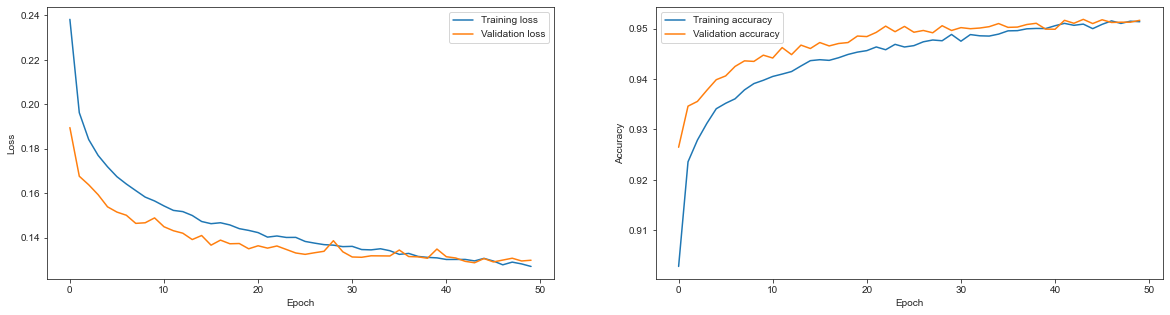

predict_proba


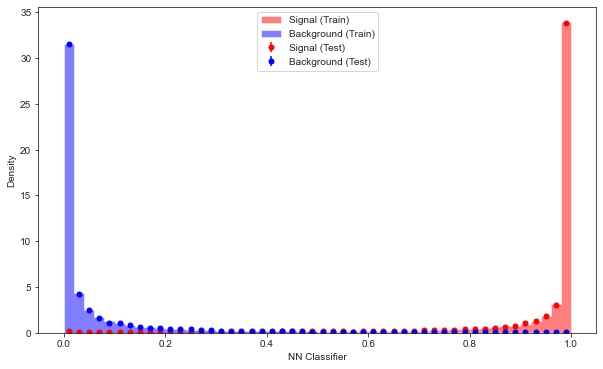

[9.9999940e-01 9.9973017e-01 4.9885213e-03 ... 1.5176475e-02 6.1206430e-02
 1.8769928e-06] 1.22643e-07 1.0 0.0 1.0
37158 37158


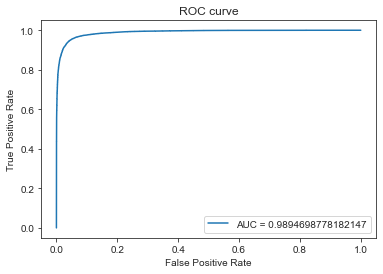

4497 2.0 1.22643e-07


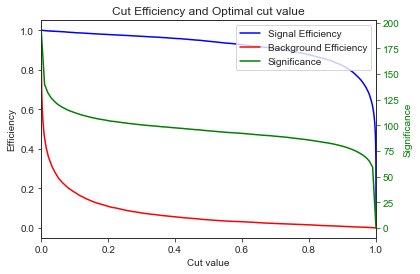

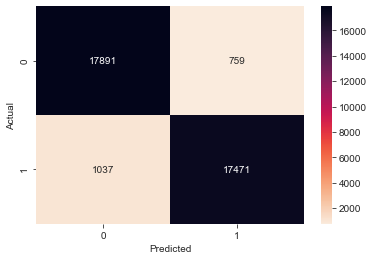

Accuracy: 0.9516658593035148
F1-Score: 0.9511132886929065
[[17891   759]
 [ 1037 17471]]
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95     18650
         1.0       0.96      0.94      0.95     18508

    accuracy                           0.95     37158
   macro avg       0.95      0.95      0.95     37158
weighted avg       0.95      0.95      0.95     37158



In [1611]:
# 1st evaluation
# training with KerasClassifier

def NN_model_1_():
    return model.NN_model_1(x_train.shape[1])

model_nn_1st = KerasClassifier(build_fn=NN_model_1_, epochs=50, batch_size=32, verbose=0)
history_nn_1st = model_nn_1st.fit(x_train, y_train, validation_data=(x_val, y_val))

plot_history(history_nn_1st)
result.evaluate(model_nn_1st, x_train, y_train, x_val, y_val, x_val_ht, model_type='NN', predict_type='predict_proba', bins=50)

In [ ]:
# fix evaluation function
# 1) change modeltype to model_sklearn='True' 
# bc predict_proba() will give the smooth roc_curve and classifier plot
# 2) change classifier plot (also color in roc_curve)
# 3) check logic of the scores
# 4) maybe we don't need evaluate_TwoModels() anymore

# edit..
# I think we should have 3 functions in evaluate class
# 1) roc_curve plot
# 2) classifier plot
# 3) scores

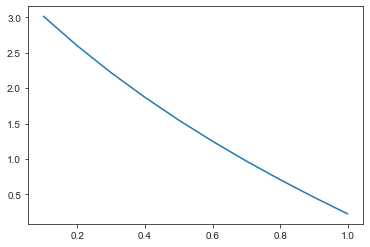

In [1547]:
a = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])
b = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
c = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) * 0.1

plt.plot(c, (a/np.sqrt(a + b)))

In [ ]:
# next step
# 1. correlation matrix
# 2. how to choose the best threshold
# 3. change or add new calculation of tp, fp, tn, fn ... etc to significance
# 4. roc_curve and efficiency plot can use the same cut value list if you don't use roc_curve()
# 5. optimize the significance by changing the cut value
# 6. background rejection vs signal efficiency --> this is similar to roc_curve

In [ ]:
# we have 6 plots
# 1. features plot
# 2. correlation matrix
# 3. feature importance //
# 4. response plot
# 5. roc_curve
# 6. efficiency, significance vs cut value

In [ ]:
# # this is 'approximate Poisson significance' 
# # (assumes that the number of observed signal and background events follows a Poisson distribution,
# and that the expected number of background events is much larger than the expected number of signal events)
# significance = np.sqrt(2 * ((n_signal_pred + n_background_pred) * np.log(1 + n_signal_pred / n_background_pred) - n_signal_pred))

## np.sum((y_test == 1) & (y_score > cut)) --> tp
## np.sum((y_test == 0) & (y_score > cut)) --> fp
## np.sum((y_test == 1) & (y_score < cut)) --> fn
## np.sum((y_test == 0) & (y_score < cut)) --> tn
## np.sum((y_test == 1) & (y_score > cut)) / np.sum(y_test == 1) --> tpr --> also be 'signal_eff'
## np.sum((y_test == 0) & (y_score > cut)) / np.sum(y_test == 0) --> fpr --> also be 'background_eff'
## np.sum((y_test == 1) & (y_score < cut)) / np.sum(y_test == 1) --> fnr
## np.sum((y_test == 0) & (y_score < cut)) / np.sum(y_test == 0) --> tnr 

## -------------------------------------------------------------------------------------##
# # This is roc_curve computing and plot (without using sklearn.metrics.roc_curve)
# # calculate tpr and fpr
# tpr, fpr = [], []
# cut_values = np.linspace(np.min(y_pred), np.max(y_pred), 100) # also call 'thesholds'
# for cut in cut_values:
#     tpr.append(np.sum((y_test == 1) & (y_pred > cut)) / np.sum(y_test == 1))
#     fpr.append(np.sum((y_test == 0) & (y_pred > cut)) / np.sum(y_test == 0))
#
# # plot the roc_curve
# fig, ax = plt.subplots()
# ax.plot(fpr, tpr)
# ax.set_xlabel('False Positive Rate')
# ax.set_ylabel('True Positive Rate')
# ax.set_title('ROC_CURVE')
# plt.show()
## -------------------------------------------------------------------------------------##

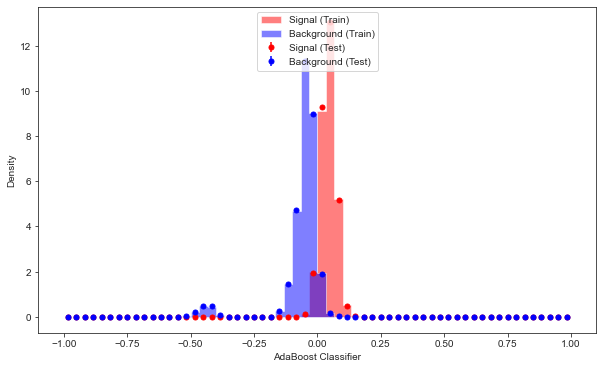

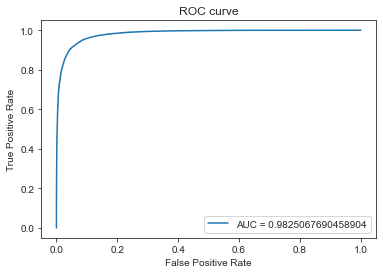

5559 1.1426685363859514 -0.5094860074650965


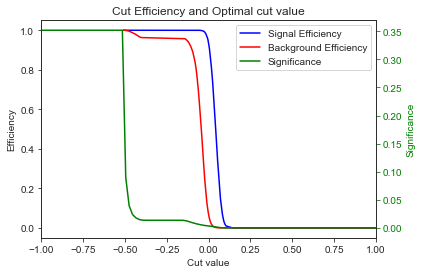

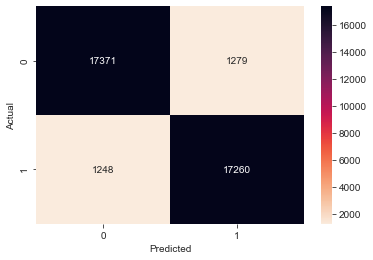

Accuracy: 0.9319931105011035
F1-Score: 0.9317893486652091
[[17371  1279]
 [ 1248 17260]]
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     18650
         1.0       0.93      0.93      0.93     18508

    accuracy                           0.93     37158
   macro avg       0.93      0.93      0.93     37158
weighted avg       0.93      0.93      0.93     37158



In [1614]:
# 1st evaluation of AdaBoost

model_Ada_1st = model.AdaBoost_model_1()
history_Ada_1st = model_Ada_1st.fit(x_train, y_train)

result.evaluate(model_Ada_1st, x_train, y_train, x_val, y_val, x_val_ht, model_type='AdaBoost', predict_type='decision_function', bins=60)

19 



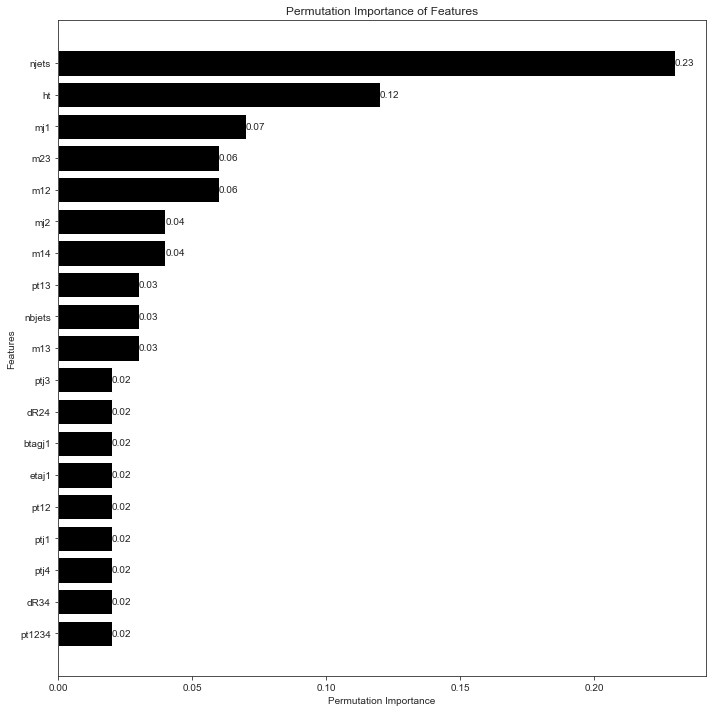

In [1615]:
# feature importance of AdaBoost using impurity-based feature importance

importance_scores = model_Ada_1st.feature_importances_

selected_features = pd.Series(importance_scores, index=selected_hist).sort_values(ascending=False)
selected_features = selected_features[selected_features > 0.01]
selected_feature_Ada_impurity = list(selected_features.index)
print(len(selected_features),'\n')
# print(selected_features,'\n')
# print(list(selected_features.index))

feature_selected_plot = selected_features.sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(10, 10))
bars = ax.barh(feature_selected_plot.index, feature_selected_plot.values, color='black')

for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
            '{:.2f}'.format(bar.get_width()), ha='left', va='center')

plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Permutation Importance of Features')
plt.tight_layout()
plt.show()


Epoch 1/10


<ipython-input-1195-e0490f45f6e3>:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_nn_FI = KerasClassifier(build_fn=NN_model_FI, epochs=10, batch_size=32)


4645/4645 [==============================] - 7s 1ms/step - loss: 0.2408 - accuracy: 0.9025 - auc_72: 0.9646
Epoch 2/10
4645/4645 [==============================] - 7s 1ms/step - loss: 0.1960 - accuracy: 0.9230 - auc_72: 0.9761
Epoch 3/10
4645/4645 [==============================] - 7s 1ms/step - loss: 0.1839 - accuracy: 0.9283 - auc_72: 0.9787
Epoch 4/10
4645/4645 [==============================] - 7s 1ms/step - loss: 0.1764 - accuracy: 0.9319 - auc_72: 0.9803
Epoch 5/10
4645/4645 [==============================] - 7s 1ms/step - loss: 0.1713 - accuracy: 0.9336 - auc_72: 0.9813
Epoch 6/10
4645/4645 [==============================] - 7s 1ms/step - loss: 0.1680 - accuracy: 0.9346 - auc_72: 0.9821
Epoch 7/10
4645/4645 [==============================] - 7s 1ms/step - loss: 0.1640 - accuracy: 0.9366 - auc_72: 0.9827
Epoch 8/10
4645/4645 [==============================] - 7s 1ms/step - loss: 0.1605 - accuracy: 0.9383 - auc_72: 0.9834
Epoch 9/10
4645/4645 [==============================] - 7s 

/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


INFO:tensorflow:Assets written to: ram://872dbd07-aad2-4bbd-9546-814ab5130033/assets


/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


INFO:tensorflow:Assets written to: ram://d3e9985d-41fa-4431-948a-17f18b2df595/assets
INFO:tensorflow:Assets written to: ram://04c12c6c-e8a1-4b75-895a-40f0593b838b/assets
INFO:tensorflow:Assets written to: ram://8c4aa48f-e8a8-4ac2-8cc5-7f6370f31d91/assets
INFO:tensorflow:Assets written to: ram://156d4ab3-d628-4d91-bc20-5437cdfe0605/assets
INFO:tensorflow:Assets written to: ram://ac9a2c45-1650-49f0-935d-88b9de8f3d0e/assets
INFO:tensorflow:Assets written to: ram://f9656f17-a75c-4b63-b7df-867d0d05ba4c/assets
INFO:tensorflow:Assets written to: ram://b82cc486-aa57-4633-9792-46305ed44d12/assets
INFO:tensorflow:Assets written to: ram://be791d0d-7fd9-482d-98b1-050cc7a0b0df/assets
INFO:tensorflow:Assets written to: ram://6ef60725-e5ae-4383-84b3-92ac35f5c534/assets


/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


INFO:tensorflow:Assets written to: ram://34508ac6-84fe-4e23-a7a3-e72c28c65b5f/assets
INFO:tensorflow:Assets written to: ram://65189873-a2ba-4025-b7eb-9d2c124b516b/assets
INFO:tensorflow:Assets written to: ram://c20c7b73-62d2-4064-867a-021866476622/assets
INFO:tensorflow:Assets written to: ram://c14a12bb-74f7-4b63-aeda-a945af355546/assets
INFO:tensorflow:Assets written to: ram://e7499d61-0a03-4c07-82f7-261dca3ee614/assets
INFO:tensorflow:Assets written to: ram://cdaf5907-d1fc-4778-be49-420bebb45f17/assets
INFO:tensorflow:Assets written to: ram://4a731e3e-43f9-4ca5-a9ce-8f32cfa111ba/assets
INFO:tensorflow:Assets written to: ram://9d2d09f4-ea11-445d-bf3f-755f2fd26645/assets
INFO:tensorflow:Assets written to: ram://9035a04e-3524-40d6-907b-fbf1094b3ca8/assets
INFO:tensorflow:Assets written to: ram://c054f991-b6b6-4dbd-9da7-c796257072bf/assets


/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


INFO:tensorflow:Assets written to: ram://c23c1955-6ab5-4a0b-a83c-3bd18adb42fa/assets


/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


INFO:tensorflow:Assets written to: ram://517f7a8a-0abf-49d1-8aa7-dc0d5e519650/assets
INFO:tensorflow:Assets written to: ram://ebe37c22-885d-494d-96e2-b1806401ab61/assets
INFO:tensorflow:Assets written to: ram://b25fe0cd-5e95-4163-a398-8365b143f9b5/assets
INFO:tensorflow:Assets written to: ram://acaf1cbf-4399-4d3d-bb6f-c22466dfb6c0/assets
INFO:tensorflow:Assets written to: ram://77e8890b-b1c8-4461-9cc1-633eac93e7b1/assets
INFO:tensorflow:Assets written to: ram://25168df4-08b4-438d-b115-75b30d4e7c29/assets
INFO:tensorflow:Assets written to: ram://304c420c-e05e-4498-bf41-775f418872e0/assets
INFO:tensorflow:Assets written to: ram://5d6af326-1c05-46df-a804-3afa5998ac66/assets
INFO:tensorflow:Assets written to: ram://db0cd5c4-11fd-4de4-898e-5509b7311d12/assets


/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


INFO:tensorflow:Assets written to: ram://e88b4d2f-d356-4cd1-8a52-87d331eb08ea/assets


/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


INFO:tensorflow:Assets written to: ram://ae55715c-122e-4206-8006-7b83605bbbf5/assets
INFO:tensorflow:Assets written to: ram://b701ca6f-3f56-44eb-804e-de5727bf6b94/assets
INFO:tensorflow:Assets written to: ram://6ce18bcb-2ef3-42f0-bd75-fb0e3121c6df/assets
INFO:tensorflow:Assets written to: ram://f63a2759-e7f2-42b4-87f2-e06c90fea532/assets
INFO:tensorflow:Assets written to: ram://7db2f675-b2b2-47b2-a387-a06fc89157b7/assets
INFO:tensorflow:Assets written to: ram://e383ed36-2680-46d8-b30d-5ac12fc45238/assets
INFO:tensorflow:Assets written to: ram://540f652f-d287-4438-949c-49344d63b834/assets
INFO:tensorflow:Assets written to: ram://975702f0-6e36-4bc2-af6a-c8432d761839/assets
19
['ht', 'mj1', 'dR23', 'pt14', 'mj2', 'nbjets', 'dR13', 'ptj2', 'm12', 'dR14', 'm23', 'm1234', 'ptj1', 'btagj3', 'ptj3', 'pt13', 'dR24', 'pt1234', 'pt23']


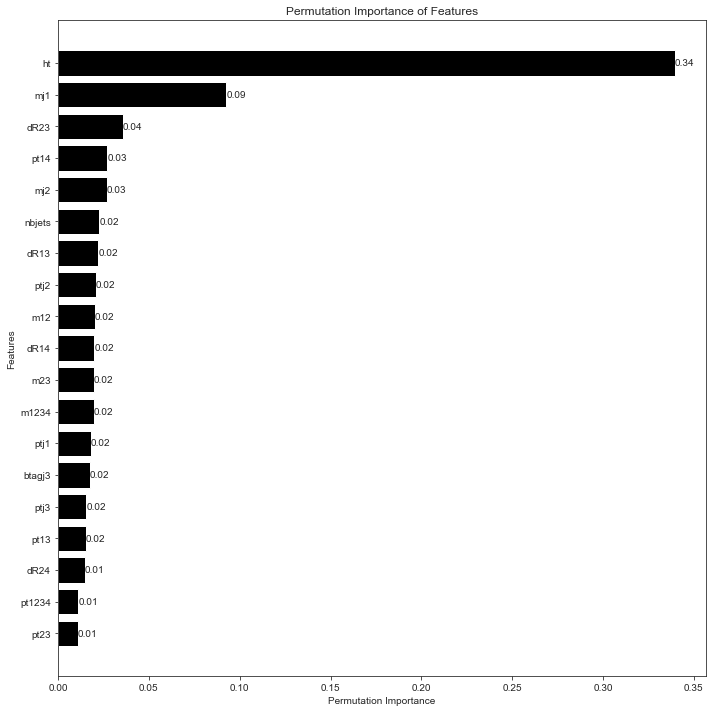

In [1195]:
# feature importance of NN using permutation importance

def NN_model_FI():
    return model.NN_model_1(x_train.shape[1])

model_nn_FI = KerasClassifier(build_fn=NN_model_FI, epochs=10, batch_size=32)

model_nn_FI.fit(x_train, y_train)

selected_feature_nn_permute = feature_importance(model_nn_FI, x_train, y_train, selected_hist)

10
['mj1', 'ht', 'm23', 'nbjets', 'njets', 'mj2', 'm13', 'm14', 'm12', 'ptj1']


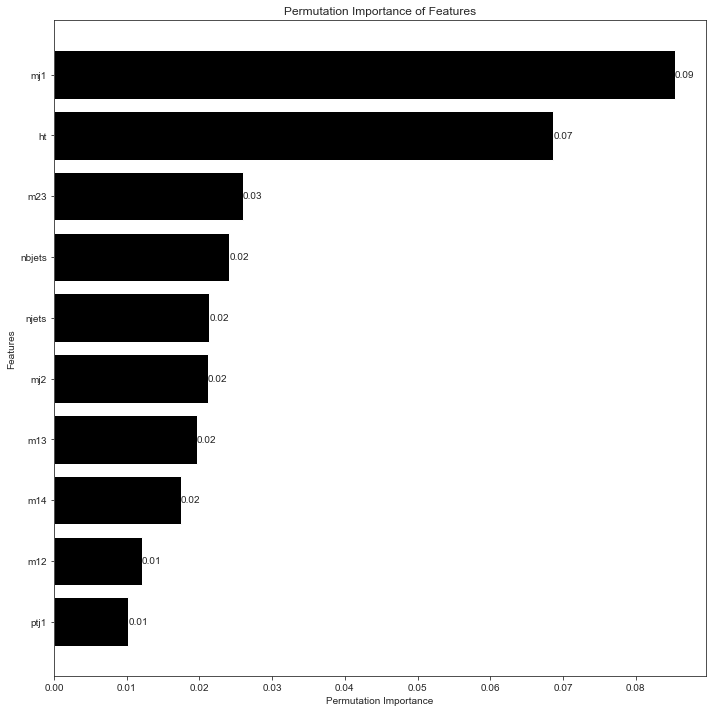

In [1196]:
# feature importance of AdaBoost using permutation importance

model_Ada_FI = model.AdaBoost_model_1()

model_Ada_FI.fit(x_train, y_train)

selected_feature_Ada_permute = feature_importance(model_Ada_FI, x_train, y_train, selected_hist)

In [1498]:
selected_nn_permute = list(selected_feature_nn_permute)
nn_permute_idx = [selected_hist.index(colname) for colname in selected_nn_permute]
nn_permute_idx.sort()

x_train_nn_permute, y_train_nn_permute = pd.DataFrame(x_train)[nn_permute_idx], y_train
x_val_nn_permute, y_val_nn_permute = pd.DataFrame(x_val)[nn_permute_idx], y_val
x_test_nn_permute, y_test_nn_permute = pd.DataFrame(x_test)[nn_permute_idx], y_test

x_train_nn_permute, y_train_nn_permute = x_train_nn_permute.to_numpy(), y_train_nn_permute.to_numpy()
x_val_nn_permute, y_val_nn_permute = x_val_nn_permute.to_numpy(), y_val_nn_permute.to_numpy()
x_test_nn_permute, y_test_nn_permute = x_test_nn_permute.to_numpy(), y_test_nn_permute.to_numpy()

<ipython-input-1616-ff5de18e6010>:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_nn_1st_ = KerasClassifier(build_fn=NN_model_1_2, epochs=50, batch_size=32, verbose=0)


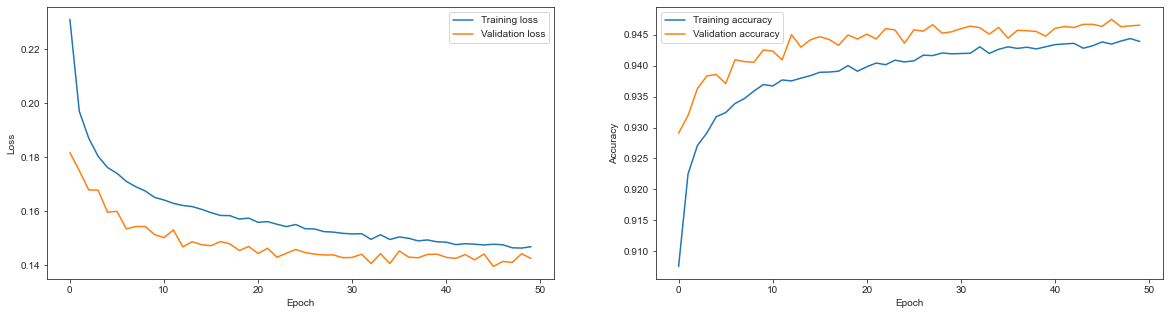

predict_proba


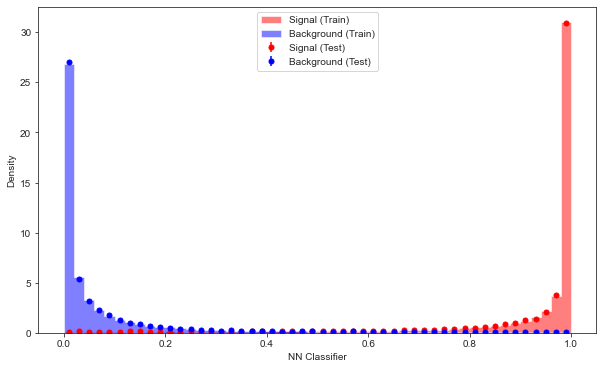

[1.         0.97275627 0.0545747  ... 0.0512439  0.08455014 0.00141403] 6.02589e-06 1.0 0.0 1.0
37158 37158


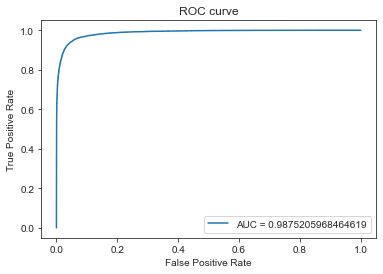

4721 2.0 6.02589e-06


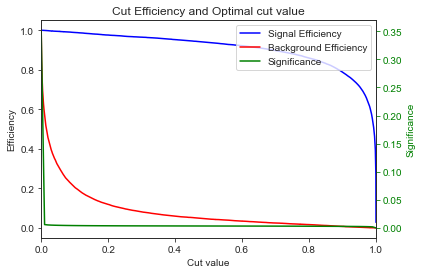

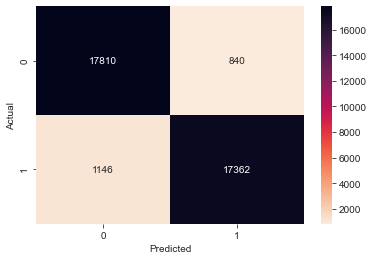

Accuracy: 0.9465525593411916
F1-Score: 0.9459002996458731
[[17810   840]
 [ 1146 17362]]
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95     18650
         1.0       0.95      0.94      0.95     18508

    accuracy                           0.95     37158
   macro avg       0.95      0.95      0.95     37158
weighted avg       0.95      0.95      0.95     37158



In [1616]:
# 1st evaluation (2)

def NN_model_1_2():
    return model.NN_model_1(x_train_nn_permute.shape[1])

model_nn_1st_ = KerasClassifier(build_fn=NN_model_1_2, epochs=50, batch_size=32, verbose=0)
history_nn_1st_ = model_nn_1st_.fit(x_train_nn_permute, y_train_nn_permute, validation_data=(x_val_nn_permute, y_val_nn_permute))

plot_history(history_nn_1st_)
result.evaluate(model_nn_1st_, x_train_nn_permute, y_train_nn_permute, x_val_nn_permute, y_val_nn_permute, x_val_ht,
                model_type='NN', predict_type='predict_proba', bins=50)

predict_proba


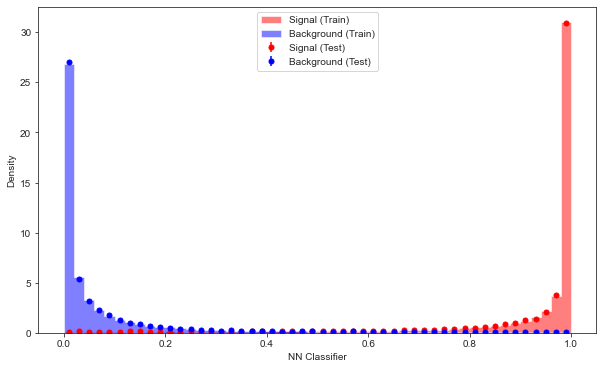

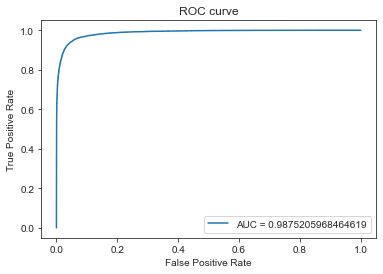

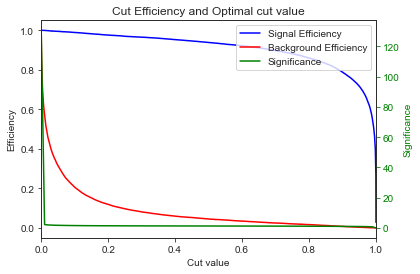

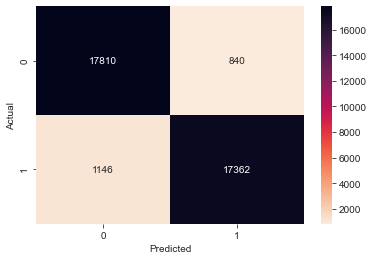

Accuracy: 0.9465525593411916
F1-Score: 0.9459002996458731
[[17810   840]
 [ 1146 17362]]
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95     18650
         1.0       0.95      0.94      0.95     18508

    accuracy                           0.95     37158
   macro avg       0.95      0.95      0.95     37158
weighted avg       0.95      0.95      0.95     37158

n_background_HT200to300: 195.31085000000002
n_background_HT300to500: 110.78891999999999
n_background_HT500to700: 10.22631142857143
n_background_HT700to1000: 1.8192392857142858
n_background_HT1000to1500: 0.2260585
n_background_HT1500to2000: 0.0080972
n_background_HT2000toInf: 0.00081852
n_background_pred_weight: 43936480.70093144
n_signal_pred_weight: 8372.92
Significance: 1.263056943338843


In [1661]:
result.evaluate(model_nn_1st_, x_train_nn_permute, y_train_nn_permute, x_val_nn_permute, y_val_nn_permute, x_val_ht,
                model_type='NN', predict_type='predict_proba', bins=50)

In [1500]:
selected_Ada_permute = list(selected_feature_Ada_permute)
Ada_permute_idx = [selected_hist.index(colname) for colname in selected_Ada_permute]
Ada_permute_idx.sort()

x_train_Ada_permute, y_train_Ada_permute = pd.DataFrame(x_train)[Ada_permute_idx], y_train
x_val_Ada_permute, y_val_Ada_permute = pd.DataFrame(x_val)[Ada_permute_idx], y_val
x_test_Ada_permute, y_test_Ada_permute = pd.DataFrame(x_test)[Ada_permute_idx], y_test

x_train_Ada_permute, y_train_Ada_permute = x_train_Ada_permute.to_numpy(), y_train_Ada_permute.to_numpy()
x_val_Ada_permute, y_val_Ada_permute = x_val_Ada_permute.to_numpy(), y_val_Ada_permute.to_numpy()
x_test_Ada_permute, y_test_Ada_permute = x_test_Ada_permute.to_numpy(), y_test_Ada_permute.to_numpy()

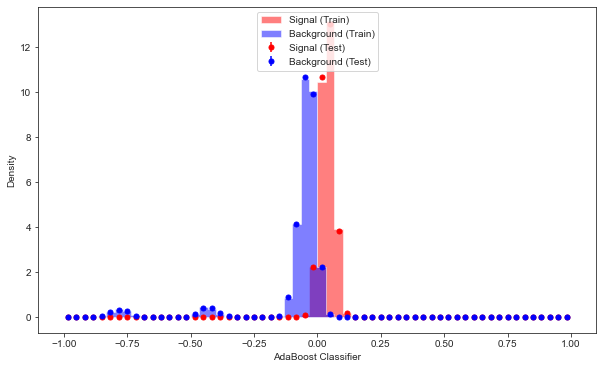

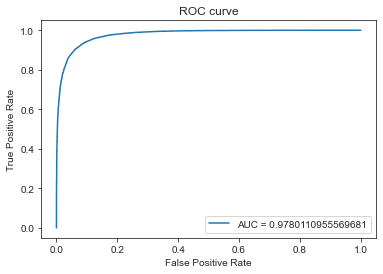

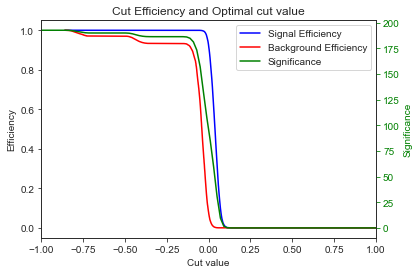

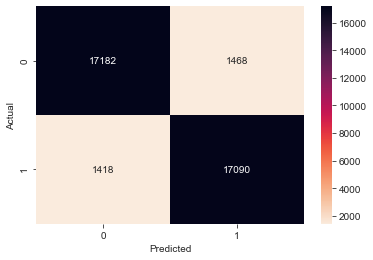

Accuracy: 0.9223316647828194
F1-Score: 0.922138887390061
[[17182  1468]
 [ 1418 17090]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     18650
         1.0       0.92      0.92      0.92     18508

    accuracy                           0.92     37158
   macro avg       0.92      0.92      0.92     37158
weighted avg       0.92      0.92      0.92     37158



In [1619]:
# 1st evaluation of AdaBoost (2 permutation)

model_Ada_1st_ = model.AdaBoost_model_1()
history_Ada_1st_ = model_Ada_1st_.fit(x_train_Ada_permute, y_train_Ada_permute)

result.evaluate(model_Ada_1st_, x_train_Ada_permute, y_train_Ada_permute, x_val_Ada_permute, y_val_Ada_permute, x_val_ht, 
                model_type='AdaBoost', predict_type='decision_function', bins=60)

In [1501]:
selected_Ada_impurity = list(selected_feature_Ada_impurity)
Ada_impurity_idx = [selected_hist.index(colname) for colname in selected_Ada_impurity]
Ada_impurity_idx.sort()

x_train_Ada_impurity, y_train_Ada_impurity = pd.DataFrame(x_train)[Ada_impurity_idx], y_train
x_val_Ada_impurity, y_val_Ada_impurity = pd.DataFrame(x_val)[Ada_impurity_idx], y_val
x_test_Ada_impurity, y_test_Ada_impurity = pd.DataFrame(x_test)[Ada_impurity_idx], y_test

x_train_Ada_impurity, y_train_Ada_impurity = x_train_Ada_impurity.to_numpy(), y_train_Ada_impurity.to_numpy()
x_val_Ada_impurity, y_val_Ada_impurity = x_val_Ada_impurity.to_numpy(), y_val_Ada_impurity.to_numpy()
x_test_Ada_impurity, y_test_Ada_impurity = x_test_Ada_impurity.to_numpy(), y_test_Ada_impurity.to_numpy()

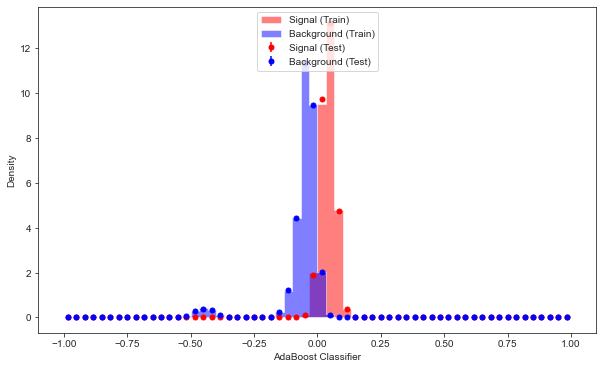

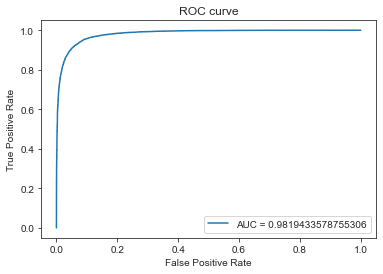

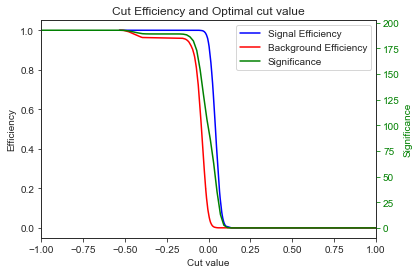

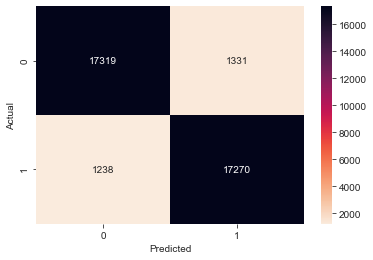

Accuracy: 0.9308628020883793
F1-Score: 0.930771510954216
[[17319  1331]
 [ 1238 17270]]
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     18650
         1.0       0.93      0.93      0.93     18508

    accuracy                           0.93     37158
   macro avg       0.93      0.93      0.93     37158
weighted avg       0.93      0.93      0.93     37158



In [1620]:
# 1st evaluation of AdaBoost (2 impurity)

model_Ada_1st_ = model.AdaBoost_model_1()
history_Ada_1st_ = model_Ada_1st_.fit(x_train_Ada_impurity, y_train_Ada_impurity)

result.evaluate(model_Ada_1st_, x_train_Ada_impurity, y_train_Ada_impurity, x_val_Ada_impurity, y_val_Ada_impurity, x_val_ht, 
                model_type='AdaBoost', predict_type='decision_function', bins=60)

In [1268]:
model_nn_tuning = KerasClassifier(build_fn=model.NN_model_2, input_dim=x_train.shape[1], output_dim=1, verbose=0)

params = {'hidden_layers': [2, 3, 4, 5], 
          'neurons': [32, 50, 64, 100, 128], 
          'dropout_rate': [0.1, 0.2, 0.3],
          'learning_rate': [0.001, 0.002, 0.003]}
          
hyperparameter_tuning(model_nn_tuning, x_train, y_train, x_val, y_val, params, method='random')

<ipython-input-1268-86afebf8ff0f>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_nn_tuning = KerasClassifier(build_fn=model.NN_model_2, input_dim=x_train_selected.shape[1], output_dim=1, verbose=0)


Best Accuracy: 0.8920944690704345 using {'neurons': 128, 'learning_rate': 0.001, 'hidden_layers': 5, 'dropout_rate': 0.1}
Test set accuracy: 89.54%
0.8905469894409179 (0.00229837666318157) with: {'neurons': 64, 'learning_rate': 0.002, 'hidden_layers': 3, 'dropout_rate': 0.3}
0.8918791651725769 (0.0028090988007153945) with: {'neurons': 64, 'learning_rate': 0.003, 'hidden_layers': 3, 'dropout_rate': 0.2}
0.8905066251754761 (0.003895081379482981) with: {'neurons': 128, 'learning_rate': 0.003, 'hidden_layers': 3, 'dropout_rate': 0.2}
0.8903989791870117 (0.0025910584909606444) with: {'neurons': 128, 'learning_rate': 0.003, 'hidden_layers': 2, 'dropout_rate': 0.3}
0.8920944690704345 (0.0029486021325384423) with: {'neurons': 128, 'learning_rate': 0.001, 'hidden_layers': 5, 'dropout_rate': 0.1}
0.8891273617744446 (0.0036404968956317654) with: {'neurons': 32, 'learning_rate': 0.002, 'hidden_layers': 5, 'dropout_rate': 0.1}
0.8893292069435119 (0.0023218669611597353) with: {'neurons': 64, 'learni

In [1266]:
model_nn_tuning = KerasClassifier(build_fn=model.NN_model_2, input_dim=x_train_nn_permute.shape[1], output_dim=1, verbose=0)

params = {'hidden_layers': [2, 3, 4, 5], 
          'neurons': [32, 50, 64, 100, 128], 
          'dropout_rate': [0.1, 0.2, 0.3],
          'learning_rate': [0.001, 0.002, 0.003]}
          
hyperparameter_tuning(model_nn_tuning, x_train_nn_permute, y_train_nn_permute, x_val_nn_permute, y_val_nn_permute, params, method='random')

<ipython-input-1266-843de2700333>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_nn_tuning = KerasClassifier(build_fn=model.NN_model_2, input_dim=x_train_nn_permute.shape[1], output_dim=1, verbose=0)


Best Accuracy: 0.9225930213928223 using {'neurons': 100, 'learning_rate': 0.001, 'hidden_layers': 2, 'dropout_rate': 0.1}
Test set accuracy: 92.97%
0.9214626908302307 (0.0024032286412480394) with: {'neurons': 100, 'learning_rate': 0.002, 'hidden_layers': 4, 'dropout_rate': 0.2}
0.9221287846565247 (0.002737563892145798) with: {'neurons': 50, 'learning_rate': 0.002, 'hidden_layers': 4, 'dropout_rate': 0.1}
0.9225930213928223 (0.0019852051101419627) with: {'neurons': 100, 'learning_rate': 0.001, 'hidden_layers': 2, 'dropout_rate': 0.1}
0.922370994091034 (0.0023295752055196356) with: {'neurons': 100, 'learning_rate': 0.002, 'hidden_layers': 5, 'dropout_rate': 0.1}
0.9114377975463868 (0.0026425914617140946) with: {'neurons': 32, 'learning_rate': 0.002, 'hidden_layers': 3, 'dropout_rate': 0.3}
0.9163762211799622 (0.003742202328300969) with: {'neurons': 32, 'learning_rate': 0.003, 'hidden_layers': 4, 'dropout_rate': 0.2}
0.9161945939064026 (0.003319104764819482) with: {'neurons': 50, 'learnin

In [1736]:
x_train_nn_permute.shape, x_val_nn_permute.shape, y_train_nn_permute.shape, y_val_nn_permute.shape

((148630, 19), (37158, 19), (148630,), (37158,))

In [1737]:
model_nn_tuning = KerasClassifier(build_fn=model.NN_model_2, input_dim=x_train_nn_permute.shape[1], output_dim=1, verbose=0)

params = {'hidden_layers': [2, 3, 4, 5], 
          'neurons': [32, 50, 64, 100, 128], 
          'dropout_rate': [0.1, 0.2, 0.3],
          'learning_rate': [0.001, 0.002, 0.003]}

hyperparameter_tuning_2(model_nn_tuning, x_train_nn_permute, y_train_nn_permute, x_val_nn_permute, y_val_nn_permute, params, method='random')

<ipython-input-1737-80d46b0a4062>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_nn_tuning = KerasClassifier(build_fn=model.NN_model_2, input_dim=x_train_nn_permute.shape[1], output_dim=1, verbose=0)


Best AUC: 0.9775885060763458 using {'neurons': 100, 'learning_rate': 0.003, 'hidden_layers': 2, 'dropout_rate': 0.1}
Test set AUC: 92.89%
0.967293737889524 (0.001949922279808128) with: {'neurons': 32, 'learning_rate': 0.001, 'hidden_layers': 4, 'dropout_rate': 0.3}
0.9750642537392219 (0.0026096664668038643) with: {'neurons': 32, 'learning_rate': 0.003, 'hidden_layers': 5, 'dropout_rate': 0.1}
0.9753620723184351 (0.0008314206909686133) with: {'neurons': 50, 'learning_rate': 0.002, 'hidden_layers': 2, 'dropout_rate': 0.2}
0.971402681011224 (0.001185271587487681) with: {'neurons': 50, 'learning_rate': 0.001, 'hidden_layers': 2, 'dropout_rate': 0.3}
0.9775711349176696 (0.001734243321699536) with: {'neurons': 100, 'learning_rate': 0.002, 'hidden_layers': 3, 'dropout_rate': 0.1}
0.9773140455943439 (0.0015635516859518438) with: {'neurons': 64, 'learning_rate': 0.002, 'hidden_layers': 5, 'dropout_rate': 0.1}
0.9753334314563409 (0.0012490174300207042) with: {'neurons': 64, 'learning_rate': 0.00

In [1275]:
model_ada_tuning = model.AdaBoost_model_2()
#model_ada_tuning = AdaBoostClassifier()

params_ada = {'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 
              'learning_rate': [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]}

hyperparameter_tuning(model_ada_tuning, x_train_Ada_impurity, y_train_Ada_impurity, x_val_Ada_impurity, y_val_Ada_impurity, params_ada, method='grid')

Best Accuracy: 0.932254591939716 using {'learning_rate': 1.0, 'n_estimators': 200}
Test set accuracy: 93.50%
0.7766668909372266 (0.002727120787976724) with: {'learning_rate': 0.01, 'n_estimators': 20}
0.7771916840476351 (0.0027143928293507365) with: {'learning_rate': 0.01, 'n_estimators': 40}
0.7781672609836506 (0.0027296095066726544) with: {'learning_rate': 0.01, 'n_estimators': 60}
0.7799838525196797 (0.0031480397644865774) with: {'learning_rate': 0.01, 'n_estimators': 80}
0.7842763910381485 (0.0024699245754105565) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.7858373141357734 (0.0033846105698534493) with: {'learning_rate': 0.01, 'n_estimators': 120}
0.7881517863150105 (0.0030786997925670062) with: {'learning_rate': 0.01, 'n_estimators': 140}
0.8381080535558096 (0.002067689426235259) with: {'learning_rate': 0.01, 'n_estimators': 160}
0.8462221624167396 (0.010256316180712478) with: {'learning_rate': 0.01, 'n_estimators': 180}
0.8595438336809528 (0.0019601118642658052) with: {'l

In [ ]:
# NN model: best learning rate = 0.001, best neurons = 100, best hidden layers = 2, best dropout rate = 0.1
# Best Accuracy: 0.9225930213928223
# Test set accuracy: 92.97%

# AdaBoost model: best learning rate = 1.0, best n_estimators = 200
# Best Accuracy: 0.932254591939716 
# Test set accuracy: 93.50%

<ipython-input-1720-cd1a12c5334a>:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_nn_last = KerasClassifier(build_fn=NN_model_2, epochs=50, batch_size=32, verbose=0)


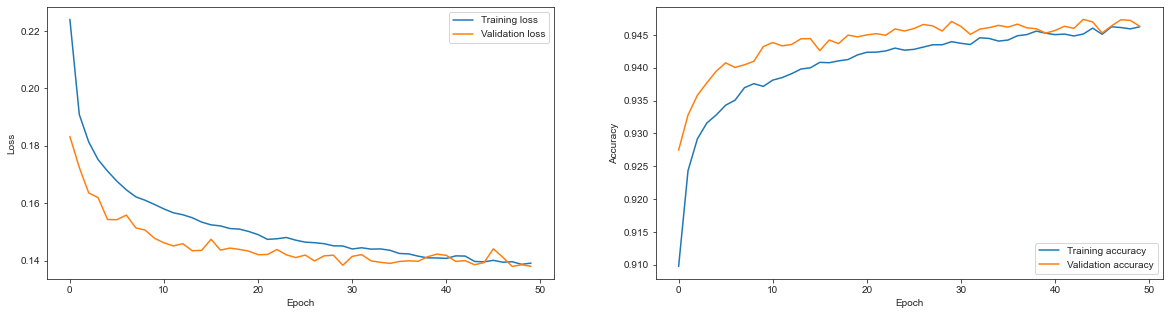

predict_proba


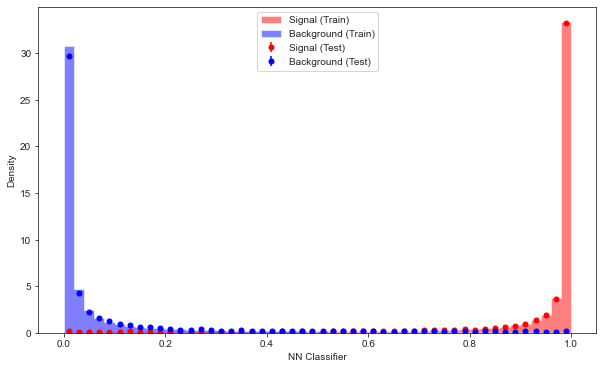

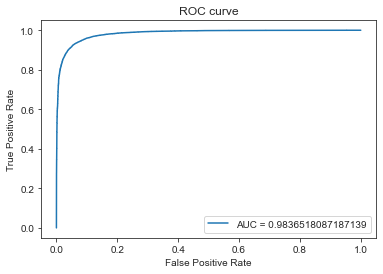

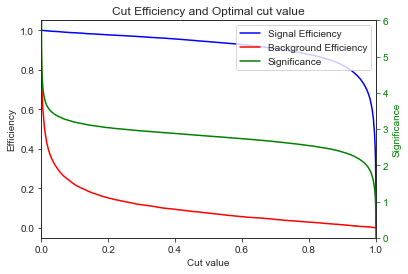

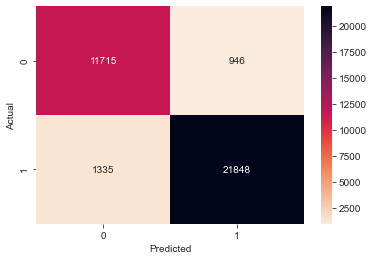

Accuracy: 0.9363631291150541
F1-Score: 0.9503882375970595
[[11715   946]
 [ 1335 21848]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91     12661
         1.0       0.96      0.94      0.95     23183

    accuracy                           0.94     35844
   macro avg       0.93      0.93      0.93     35844
weighted avg       0.94      0.94      0.94     35844

n_background_HT200to300: 139.1439
n_background_HT300to500: 72.19727999999999
n_background_HT500to700: 6.993148571428572
n_background_HT700to1000: 1.2618192857142858
n_background_HT1000to1500: 0.1636011
n_background_HT1500to2000: 0.0056482
n_background_HT2000toInf: 0.000519114
n_background_pred_weight: 65929774.881342866
n_signal_pred_weight: 22794.0
Significance: 2.8072413190375793


In [1720]:
# final model and evaluation of NN

model_nn_final = model.NN_model_2(input_dim=x_train_nn_permute.shape[1],
                                  output_dim=1, hidden_layers=2, neurons=100, dropout_rate=0.1, learning_rate=0.001)

def NN_model_2():
    return model_nn_final

model_nn_last = KerasClassifier(build_fn=NN_model_2, epochs=50, batch_size=32, verbose=0)
history_nn_last = model_nn_last.fit(x_train_nn_permute, y_train_nn_permute, validation_data=(x_val_nn_permute, y_val_nn_permute))

plot_history(history_nn_last)
result.evaluate(model_nn_last, x_train_nn_permute, y_train_nn_permute, x_test_nn_permute, y_test_nn_permute, x_test_ht,
                model_type='NN', predict_type='predict_proba', bins=50)

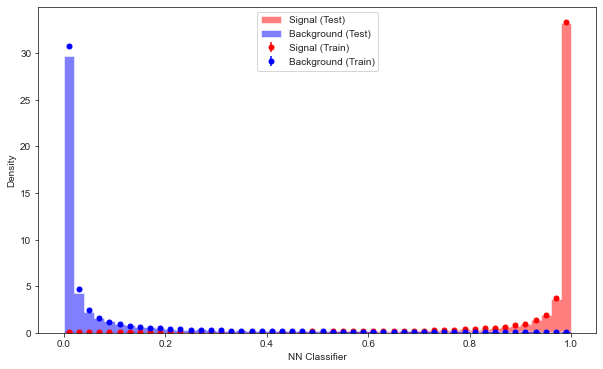

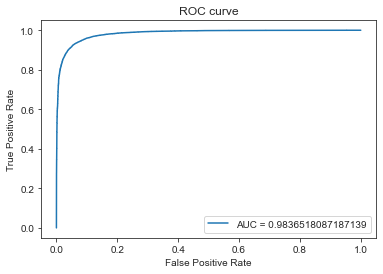

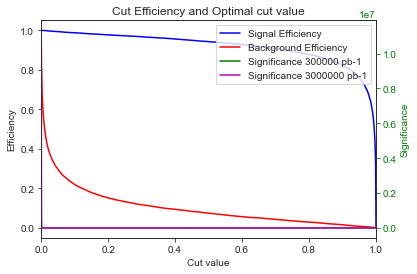

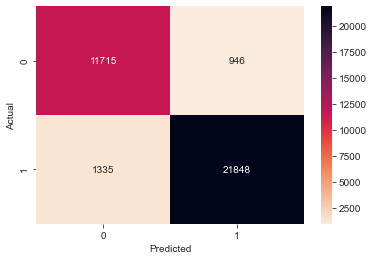

Accuracy: 0.9363631291150541
F1-Score: 0.9503882375970595
[[11715   946]
 [ 1335 21848]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91     12661
         1.0       0.96      0.94      0.95     23183

    accuracy                           0.94     35844
   macro avg       0.93      0.93      0.93     35844
weighted avg       0.94      0.94      0.94     35844

n_background_HT200to300: 139.1439
n_background_HT300to500: 72.19727999999999
n_background_HT500to700: 6.993148571428572
n_background_HT700to1000: 1.2618192857142858
n_background_HT1000to1500: 0.1636011
n_background_HT1500to2000: 0.0056482
n_background_HT2000toInf: 0.000519114
n_background_pred: 65929774.881342866
n_signal_pred: 22794.0
Significance for 300000 pb-1: 2.8072413190375793
n_background_HT200to300: 139.1439
n_background_HT300to500: 72.19727999999999
n_background_HT500to700: 6.993148571428572
n_background_HT700to1000: 1.2618192857142858
n_background_HT1000to1500: 0.163

In [1748]:
result.evaluate(model_nn_last, x_train_nn_permute, y_train_nn_permute, x_test_nn_permute, y_test_nn_permute, x_test_ht,
                model_type='NN', predict_type='predict_proba', bins=50)

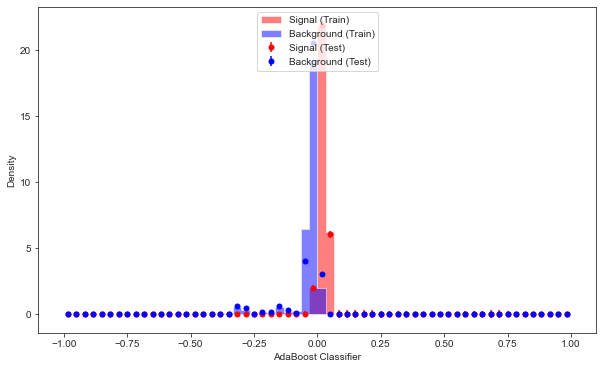

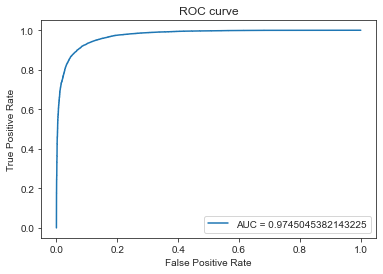

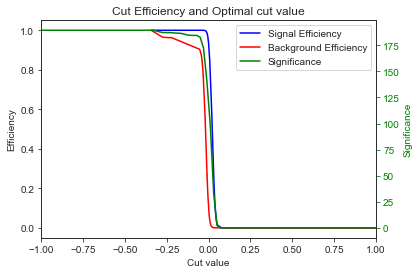

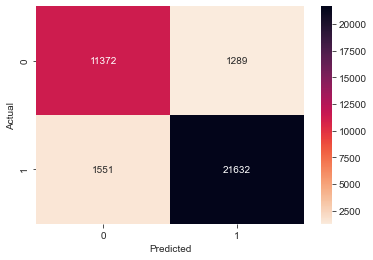

Accuracy: 0.9207677714540787
F1-Score: 0.9384001388165886
[[11372  1289]
 [ 1551 21632]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     12661
         1.0       0.94      0.93      0.94     23183

    accuracy                           0.92     35844
   macro avg       0.91      0.92      0.91     35844
weighted avg       0.92      0.92      0.92     35844



In [1622]:
# final model and evaluation of AdaBoost

model_Ada_last = model.AdaBoost_model_1(n_estimators=200, learning_rate=1.0)
history_Ada_last = model_Ada_last.fit(x_train_Ada_impurity, y_train_Ada_impurity)

result.evaluate(model_Ada_last, x_train_Ada_impurity, y_train_Ada_impurity, x_test_Ada_impurity, y_test_Ada_impurity, x_test_ht,
                model_type='AdaBoost', predict_type='decision_function', bins=60)

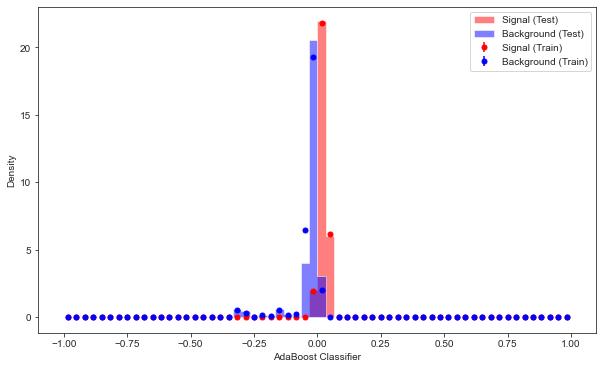

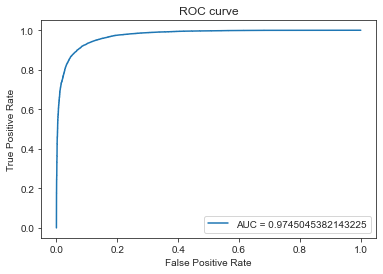

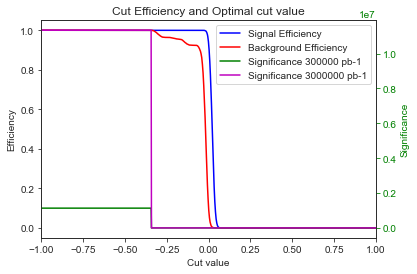

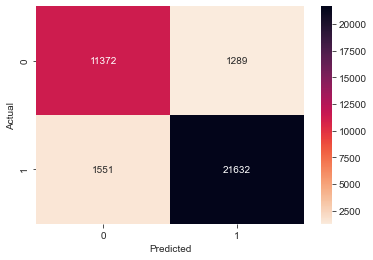

Accuracy: 0.9207677714540787
F1-Score: 0.9384001388165886
[[11372  1289]
 [ 1551 21632]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     12661
         1.0       0.94      0.93      0.94     23183

    accuracy                           0.92     35844
   macro avg       0.91      0.92      0.91     35844
weighted avg       0.92      0.92      0.92     35844

n_background_HT200to300: 139.1439
n_background_HT300to500: 71.66544
n_background_HT500to700: 6.980402857142858
n_background_HT700to1000: 1.2677492857142858
n_background_HT1000to1500: 0.15622118333333332
n_background_HT1500to2000: 0.005301
n_background_HT2000toInf: 0.000553578
n_background_pred: 65765870.37125715
n_signal_pred: 22921.0
Significance for 300000 pb-1: 2.8263977265851254
n_background_HT200to300: 139.1439
n_background_HT300to500: 71.66544
n_background_HT500to700: 6.980402857142858
n_background_HT700to1000: 1.2677492857142858
n_background_HT1000to1500: 0.1562211833333

In [1753]:
result.evaluate(model_Ada_last, x_train_Ada_impurity, y_train_Ada_impurity, x_test_Ada_impurity, y_test_Ada_impurity, x_test_ht,
                model_type='AdaBoost', predict_type='decision_function', bins=60)

In [ ]:
# HT200to300 80430.0/600000
# HT300to500 16620.0/500000
# HT500to700  1487.0/700000
# HT700to1000  296.5/700000
# HT1000to1500  46.61/600000
# HT1500to2000  3.72/600000
# HT2000toInf  0.6462/600000

# 1 pb/300000

# efficiency = n_events_after/n_events_before --> this is not all right
# significant = signal/sqrt(signal + background)

In [ ]:
## step by step
# 1. run test dataset (roc_curve, auc, confusion matrix, accuracy, classifier plot)
# 2. cut events by classifier criteria
# 3. take weight of signal and background
# 4. calculate efficiency and significance
# 5. plot efficiency and significance /
# 6. plot classifier distribution /
# 7. plot classifier distribution with cut /
# 8. plot classifier distribution with cut and weight /
# 9. plot classifier distribution with cut and weight (log scale) /